# Overview

Alphalens is designed to aid in the analysis of "alpha factors," data transformations that are used to predict future price movements of financial instruments. Alpha factors take the form of a single value for each asset on each day. The dimension of these values is not necessarily important. We evaluate an alpha factor by considering daily factor values relative to one another. 

It is important to note the difference between an alpha factor and a trading algorithm. A trading algorithm uses an alpha factor, or combination of alpha factors to generate trades.  Trading algorithms cover execution and risk constraints: the business of turning predictions into profits. Alpha factors, on the other hand, are focused soley on making predictions. This difference in scope lends itself to a difference in the methodologies used to evaluate alpha factors and trading algorithms. 

Alphalens does not contain analyses of things like transaction costs, capacity, or portfolio construction. Those interested in more implementation specific analyses are encouaged to check out [pyfolio](https://github.com/stefan-jansen/pyfolio-reloaded), a library specifically geared towards the evaluation of trading algorithms.

## Imports & Settings

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
import pandas as pd
import alphalens
import seaborn as sns

In [18]:
%matplotlib inline
sns.set_style('white')

## Load & Transform Data

In [19]:
ticker_sector = {
    "PETR4.SA": 10, "VALE3.SA": 10, "ABEV3.SA": 4, "ITUB3.SA": 1, "BBDC3.SA": 1, "WEGE3.SA": 2, "BBAS3.SA": 1, "SANB3": 1,
    "ELET3.SA": 4, "BPAC3.SA": 1, "ITSA3.SA": 1, "B3SA.SA": 1, "VIVT3.SA": 1, "RDOR3.SA": 4, "JBSS3.SA": 4, "RENT3.SA": 3,

}


ticker_sector = {
    "ACN": 0, "ATVI": 0, "ADBE": 0, "AMD": 0, "AKAM": 0, "ADS": 0, "GOOGL": 0, "GOOG": 0,
    "APH": 0, "ADI": 0, "ANSS": 0, "AAPL": 0, "AMAT": 0, "ADSK": 0, "ADP": 0, "AVGO": 0,
    "AMG": 1, "AFL": 1, "ALL": 1, "AXP": 1, "AIG": 1, "AMP": 1, "AON": 1, "AJG": 1, "AIZ": 1, "BAC": 1,
    "BK": 1, "BBT": 1, "BRK.B": 1, "BLK": 1, "HRB": 1, "BHF": 1, "COF": 1, "CBOE": 1, "SCHW": 1, "CB": 1,
    "ABT": 2, "ABBV": 2, "AET": 2, "A": 2, "ALXN": 2, "ALGN": 2, "AGN": 2, "ABC": 2, "AMGN": 2, "ANTM": 2,
    "BCR": 2, "BAX": 2, "BDX": 2, "BIIB": 2, "BSX": 2, "BMY": 2, "CAH": 2, "CELG": 2, "CNC": 2, "CERN": 2,
    "MMM": 3, "AYI": 3, "ALK": 3, "ALLE": 3, "AAL": 3, "AME": 3, "AOS": 3, "ARNC": 3, "BA": 3, "CHRW": 3,
    "CAT": 3, "CTAS": 3, "CSX": 3, "CMI": 3, "DE": 3, "DAL": 3, "DOV": 3, "ETN": 3, "EMR": 3, "EFX": 3,
    "AES": 4, "LNT": 4, "AEE": 4, "AEP": 4, "AWK": 4, "CNP": 4, "CMS": 4, "ED": 4, "D": 4, "DTE": 4,
    "DUK": 4, "EIX": 4, "ETR": 4, "ES": 4, "EXC": 4, "FE": 4, "NEE": 4, "NI": 4, "NRG": 4, "PCG": 4,
    "ARE": 5, "AMT": 5, "AIV": 5, "AVB": 5, "BXP": 5, "CBG": 5, "CCI": 5, "DLR": 5, "DRE": 5,
    "EQIX": 5, "EQR": 5, "ESS": 5, "EXR": 5, "FRT": 5, "GGP": 5, "HCP": 5, "HST": 5, "IRM": 5, "KIM": 5,
    "APD": 6, "ALB": 6, "AVY": 6, "BLL": 6, "CF": 6, "DWDP": 6, "EMN": 6, "ECL": 6, "FMC": 6, "FCX": 6,
    "IP": 6, "IFF": 6, "LYB": 6, "MLM": 6, "MON": 6, "MOS": 6, "NEM": 6, "NUE": 6, "PKG": 6, "PPG": 6,
    "T": 7, "CTL": 7, "VZ": 7,
    "MO": 8, "ADM": 8, "BF.B": 8, "CPB": 8, "CHD": 8, "CLX": 8, "KO": 8, "CL": 8, "CAG": 8,
    "STZ": 8, "COST": 8, "COTY": 8, "CVS": 8, "DPS": 8, "EL": 8, "GIS": 8, "HSY": 8, "HRL": 8,
    "AAP": 9, "AMZN": 9, "APTV": 9, "AZO": 9, "BBY": 9, "BWA": 9, "KMX": 9, "CCL": 9,
    "APC": 10, "ANDV": 10, "APA": 10, "BHGE": 10, "COG": 10, "CHK": 10, "CVX": 10, "XEC": 10, "CXO": 10,
    "COP": 10, "DVN": 10, "EOG": 10, "EQT": 10, "XOM": 10, "HAL": 10, "HP": 10, "HES": 10, "KMI": 10
}



See [yfinance](https://github.com/ranaroussi/yfinance) for details.

In [20]:
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()

tickers = list(ticker_sector.keys())
df = web.get_data_yahoo(tickers, start='2014-12-01',  end='2017-01-01')
df.index = pd.to_datetime(df.index, utc=True)

[*********************100%***********************]  182 of 182 completed

26 Failed downloads:
- BBT: No data found, symbol may be delisted
- APC: No data found, symbol may be delisted
- ALXN: No data found, symbol may be delisted
- CHK: Data doesn't exist for startDate = 1417402800, endDate = 1483239600
- DWDP: No data found, symbol may be delisted
- MON: Data doesn't exist for startDate = 1417402800, endDate = 1483239600
- CXO: No data found, symbol may be delisted
- COG: No data found, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
- ARNC: Data doesn't exist for startDate = 1417402800, endDate = 1483239600
- AGN: No data found, symbol may be delisted
- BHF: Data doesn't exist for startDate = 1417402800, endDate = 1483239600
- XEC: No data found, symbol may be delisted
- BHGE: No data found, symbol may be delisted
- BLL: No data found, symbol may be delisted
- HCP: Data doesn't exist for startDate = 1417402800, endDate = 1483239600
- ADS: No data found, symbol 

In [21]:
df = df.stack()
df.index.names = ['date', 'asset']
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 82056 entries, (Timestamp('2014-12-01 00:00:00+0000', tz='UTC'), 'A') to (Timestamp('2016-12-30 00:00:00+0000', tz='UTC'), 'XOM')
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  82056 non-null  float64
 1   Close      82056 non-null  float64
 2   High       82056 non-null  float64
 3   Low        82056 non-null  float64
 4   Open       82056 non-null  float64
 5   Volume     82056 non-null  float64
dtypes: float64(6)
memory usage: 4.1+ MB


## Compute Factor

For demonstration purposes we will create a predictive factor. To cheat we will look at future prices (5 days into the future) to make sure we'll rank stocks that will perform well high, and vice versa.

In [22]:
lookahead_bias_days = 5

predictive_factor = df.loc[:, 'Open'].unstack('asset')
predictive_factor = predictive_factor.pct_change(lookahead_bias_days)
# introduce look-ahead bias and make the factor predictive
predictive_factor = predictive_factor.shift(-lookahead_bias_days)

predictive_factor = predictive_factor.stack()

In [23]:
predictive_factor.head()

date                       asset
2014-12-01 00:00:00+00:00  A       -0.010775
                           AAL      0.029388
                           AAP      0.057920
                           AAPL    -0.039643
                           ABBV     0.010567
dtype: float64

## Get pricing info

The pricing data passed to alphalens should contain the entry price for the assets so it must reflect the next available price after a factor value was observed at a given timestamp. Those prices must not be used in the calculation of the factor values for that time. Always double check to ensure you are not introducing lookahead bias to your study.

The pricing data must also contain the exit price for the assets, for period 1 the price at the next timestamp will be used, for period 2 the price after 2 timestats will be used and so on.

There are no restrinctions/assumptions on the time frequencies a factor should be computed at and neither on the specific time a factor should be traded (trading at the open vs trading at the close vs intraday trading), it is only required that factor and price DataFrames are properly aligned given the rules above.

In our example, before the trading starts every day, we observe yesterday factor values. The price we pass to alphalens is the next available price after that factor observation: the daily open price that will be used as assets entry price. Also, we are not adding additional prices so the assets exit price will be the following days open prices (how many days depends on 'periods' argument). The retuns computed by Alphalens will therefore based on  assets open prices.

In [24]:
pricing = df.loc[:, 'Open'].iloc[1:].unstack('asset')
pricing.head()

asset                            AAL         AAP       AAPL       ABBV  \
date                                                                     
2014-12-01 00:00:00+00:00  49.000000  146.410004  29.702499  69.080002   
2014-12-02 00:00:00+00:00  48.119999  146.710007  28.375000  68.879997   
2014-12-03 00:00:00+00:00  47.740002  148.440002  28.937500  69.169998   
2014-12-04 00:00:00+00:00  49.599998  152.419998  28.942499  68.349998   
2014-12-05 00:00:00+00:00  50.090000  154.210007  28.997499  69.519997   

asset                            ABC        ABT        ACN       ADBE  \
date                                                                    
2014-12-01 00:00:00+00:00  90.639999  44.270000  85.879997  73.639999   
2014-12-02 00:00:00+00:00  90.930000  44.680000  85.849998  74.000000   
2014-12-03 00:00:00+00:00  91.989998  45.220001  86.400002  73.639999   
2014-12-04 00:00:00+00:00  91.870003  45.660000  86.410004  73.089996   
2014-12-05 00:00:00+00:00  92.379997  45.430000  86.309998  73.160004   

asset                            ADI        ADM  ...        NUE        PCG  \
date                                             ...                         
2014-12-01 00:00:00+00:00  54.480000  52.660000  ...  53.680000  50.209999   
2014-12-02 00:00:00+00:00  54.540001  52.740002  ...  53.410000  50.689999   
2014-12-03 00:00:00+00:00  54.950001  53.330002  ...  53.389999  51.500000   
2014-12-04 00:00:00+00:00  56.459999  53.270000  ...  55.000000  50.910000   
2014-12-05 00:00:00+00:00  56.750000  52.750000  ...  55.020000  49.860001   

asset                            PKG         PPG       SCHW        STZ  \
date                                                                     
2014-12-01 00:00:00+00:00  74.250000  108.730003  28.080000  95.820000   
2014-12-02 00:00:00+00:00  73.209999  110.605003  27.860001  94.930000   
2014-12-03 00:00:00+00:00  74.779999  109.800003  28.200001  94.260002   
2014-12-04 00:00:00+00:00  76.760002  111.555000  28.940001  94.010002   
2014-12-05 00:00:00+00:00  77.790001  111.949997  29.770000  94.250000   

asset                              T         VZ        XOM          A  
date                                                                   
2014-12-01 00:00:00+00:00  26.646526  50.680000  90.360001        NaN  
2014-12-02 00:00:00+00:00  26.351965  49.799999  92.320000  41.599998  
2014-12-03 00:00:00+00:00  25.868580  49.020000  94.669998  41.980000  
2014-12-04 00:00:00+00:00  25.740181  48.730000  94.129997  42.150002  
2014-12-05 00:00:00+00:00  25.589125  48.680000  93.949997  42.230000  

[5 rows x 156 columns]

Often, we'd want to know how our factor looks across various groupings (sectors, industires, countries, etc.), in this example let's use sectors. To generate sector level breakdowns, you'll need to pass alphalens a sector mapping for each traded name. 

This mapping can come in the form of a MultiIndexed Series (with the same date/symbol index as your factor value) if you want to provide a sector mapping for each symbol on each day. 

If you'd like to use constant sector mappings, you may pass symbol to sector mappings as a dict.

If your sector mappings come in the form of codes (as they do in this tutorial), you may also pass alphalens a dict of sector names to use in place of sector codes.

In [25]:
sector_names = {
    0: "information_technology",
    1: "financials",
    2: "health_care",
    3: "industrials",
    4: "utilities",
    5: "real_estate",
    6: "materials",
    7: "telecommunication_services",
    8: "consumer_staples",
    9: "consumer_discretionary",
    10: "energy"
}

## Format tearsheet input data

Alphalens contains a handy data formatting function to transform your factor and pricing data into the exact inputs expected by the tear sheet functions.

In [26]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(predictive_factor,
                                                                   pricing,
                                                                   quantiles=5,
                                                                   bins=None,
                                                                   groupby=ticker_sector,
                                                                   groupby_labels=sector_names)

Dropped 1.0% entries from factor data: 1.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


The function inform the user how much data was dropped after formatting the input data. Factor data can be partially dropped due to being flawed itself (e.g. NaNs), not having provided enough price data to compute forward returns for all factor values, or because it is not possible to perform binning. It is possible to control the maximum allowed data loss using 'max_loss' argument.

In [27]:
factor_data.head()

1D        5D       10D    factor  \
date                      asset                                           
2014-12-01 00:00:00+00:00 AAL   -0.017959  0.029388  0.024694  0.029388   
                          AAP    0.002049  0.057920  0.104433  0.057920   
                          AAPL  -0.044693 -0.039643 -0.068260 -0.039643   
                          ABBV  -0.002895  0.010567 -0.048205  0.010567   
                          ABC    0.003199  0.015115  0.010040  0.015115   

                                                  group  factor_quantile  
date                      asset                                           
2014-12-01 00:00:00+00:00 AAL               industrials                5  
                          AAP    consumer_discretionary                5  
                          AAPL   information_technology                1  
                          ABBV              health_care                3  
                          ABC               health_care                4

You'll notice that we've placed all of the information we need for our calculations into one dataframe. Variables are the columns, and observations are each row.

The integer columns represents the forward returns or the daily price change for the N days after a timestamp. The 1 day forward return for AAPL on 2014-12-2 is the percent change in the AAPL open price on 2014-12-2 and the AAPL open price on 2014-12-3. The 5 day forward return is the percent change from open 2014-12-2 to open 2014-12-9 (5 trading days) divided by 5.

# Returns Analysis

Returns analysis gives us a raw description of a factor's value that shows us the power of a factor in real currency values.

One of the most basic ways to look at a factor's predictive power is to look at the mean return of different factor quantile. 

## Performance Metrics & Plotting Functions

In [28]:
mean_return_by_q_daily, std_err = alphalens.performance.mean_return_by_quantile(
    factor_data, by_date=True)

In [29]:
mean_return_by_q_daily.head()

1D        5D       10D
factor_quantile date                                                   
1               2014-12-01 00:00:00+00:00 -0.012609 -0.040357 -0.049957
                2014-12-02 00:00:00+00:00 -0.001093 -0.041839 -0.052210
                2014-12-03 00:00:00+00:00 -0.009242 -0.048052 -0.049586
                2014-12-04 00:00:00+00:00 -0.004156 -0.049301 -0.031943
                2014-12-05 00:00:00+00:00 -0.013076 -0.057553 -0.038681

In [30]:
mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(factor_data,
                                                                               by_date=False)

In [31]:
mean_return_by_q.head()

1D        5D       10D
factor_quantile                              
1               -0.008454 -0.040361 -0.040278
2               -0.002632 -0.013111 -0.013618
3               -0.000064 -0.000155 -0.000174
4                0.002806  0.012793  0.013092
5                0.008616  0.042134  0.042275

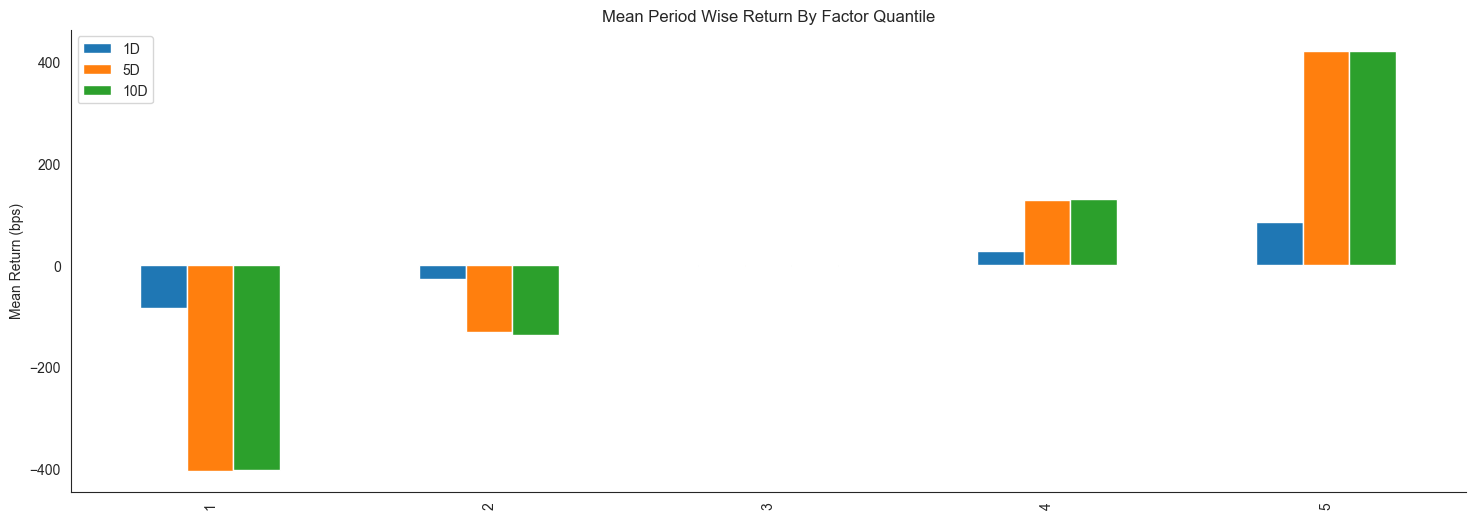

In [32]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_by_q)
sns.despine()

By looking at the mean return by quantile we can get a real look at how well the factor differentiates forward returns across the signal values. Obviously we want securities with a better signal to exhibit higher returns. For a good factor we'd expect to see negative values in the lower quartiles and positive values in the upper quantiles.

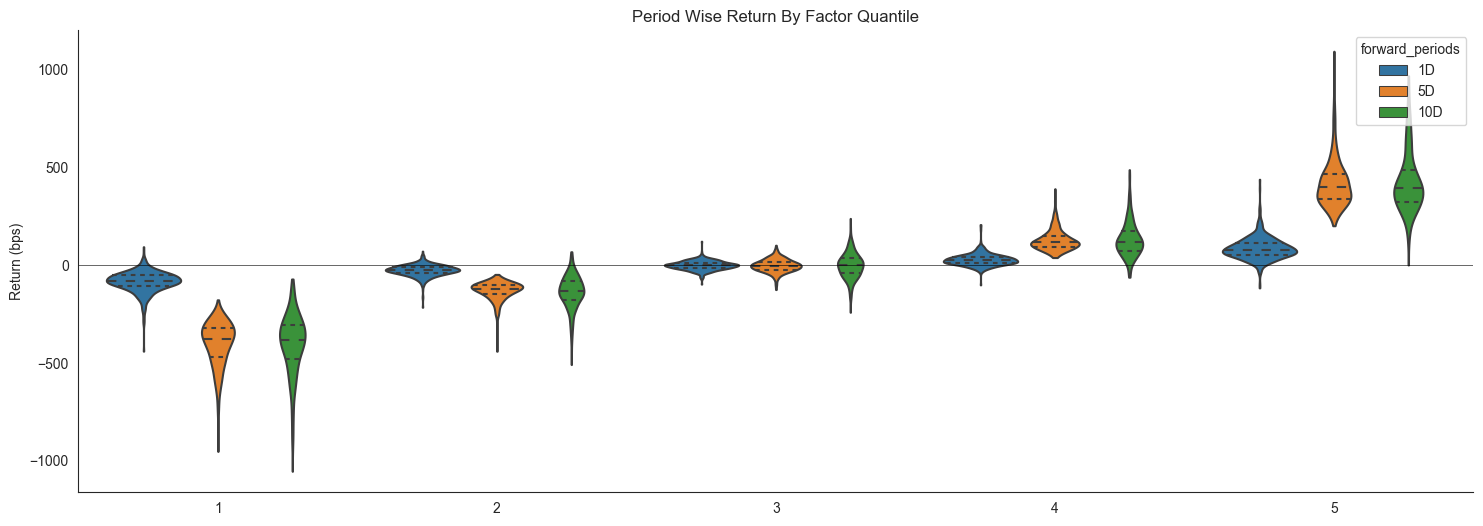

In [33]:
alphalens.plotting.plot_quantile_returns_violin(mean_return_by_q_daily)
sns.despine()

This violin plot is similar to the one before it but shows more information about the underlying data. It gives a better idea about the range of values, the median, and the inter-quartile range. What gives the plots their shape is the application of a probability density of the data at different values.

In [34]:
quant_return_spread, std_err_spread = alphalens.performance.compute_mean_returns_spread(mean_return_by_q_daily,
                                                                                        upper_quant=5,
                                                                                        lower_quant=1,
                                                                                        std_err=std_err)

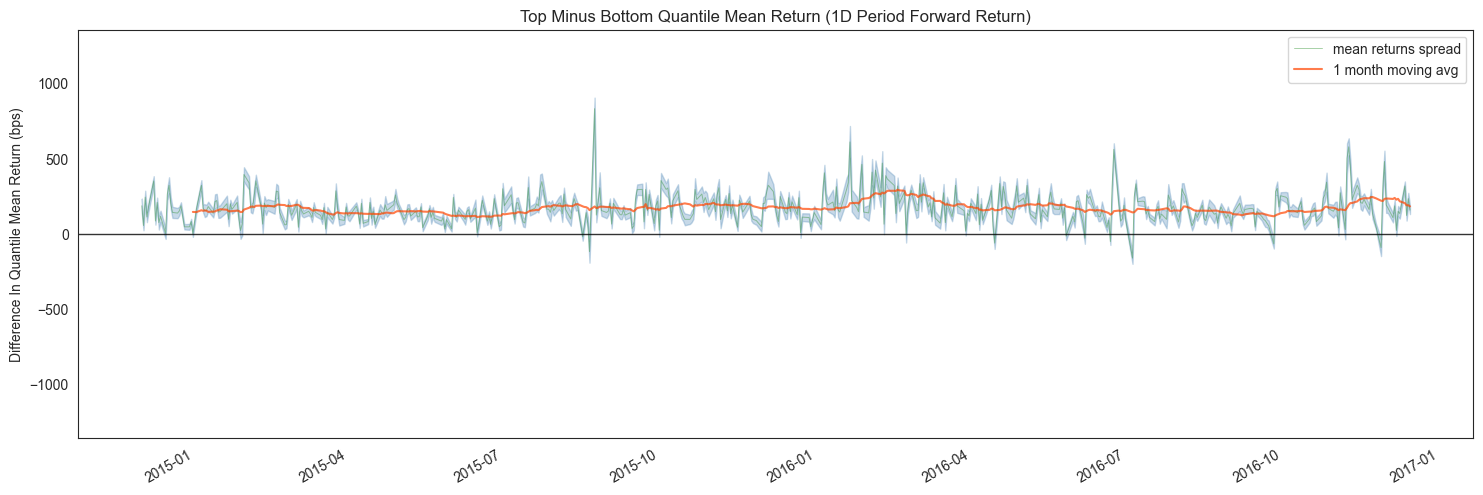

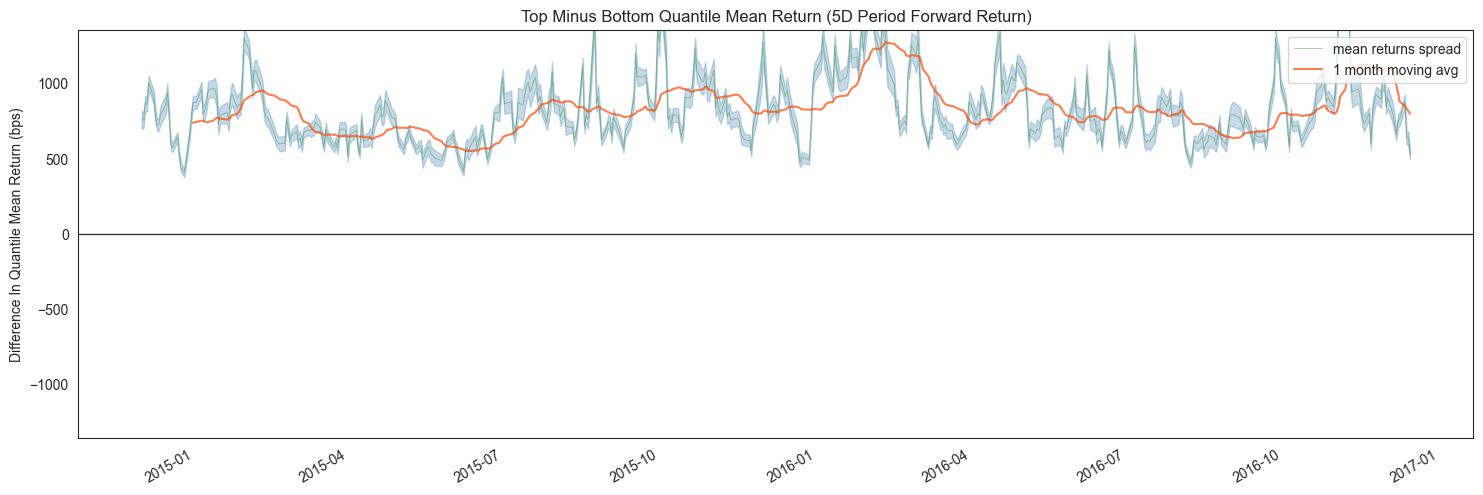

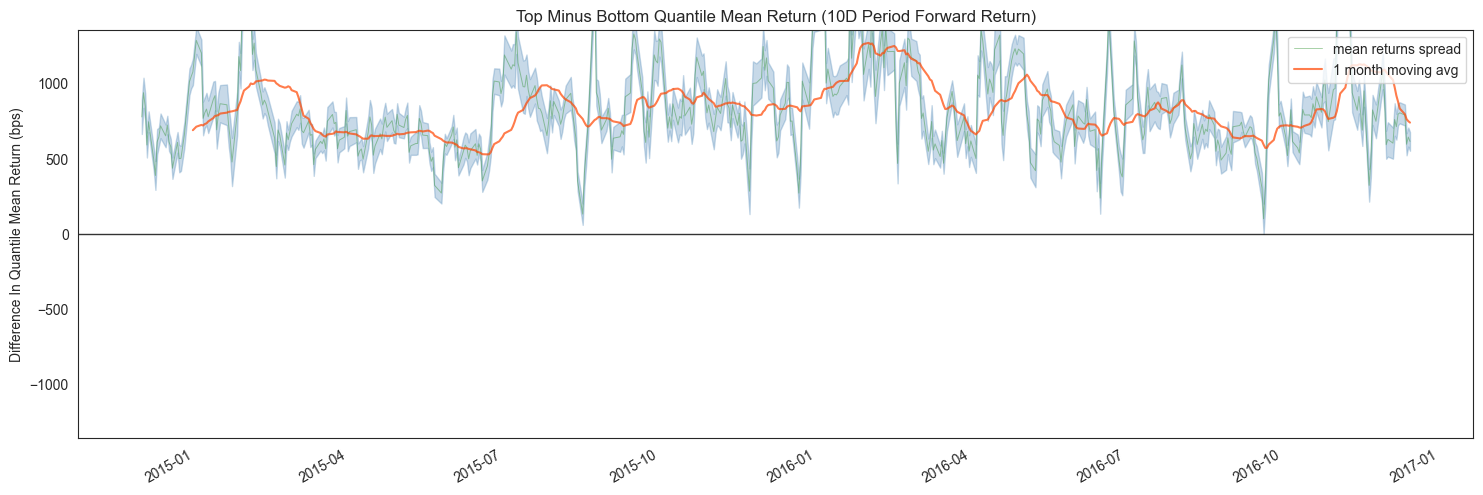

In [35]:
alphalens.plotting.plot_mean_quantile_returns_spread_time_series(
    quant_return_spread, std_err_spread);

This rolling forward returns spread graph allows us to look at the raw spread in basis points between the top and bottom quantiles over time. The green line is the returns spread while the orange line is a 1 month average to smooth the data and make it easier to visualize.

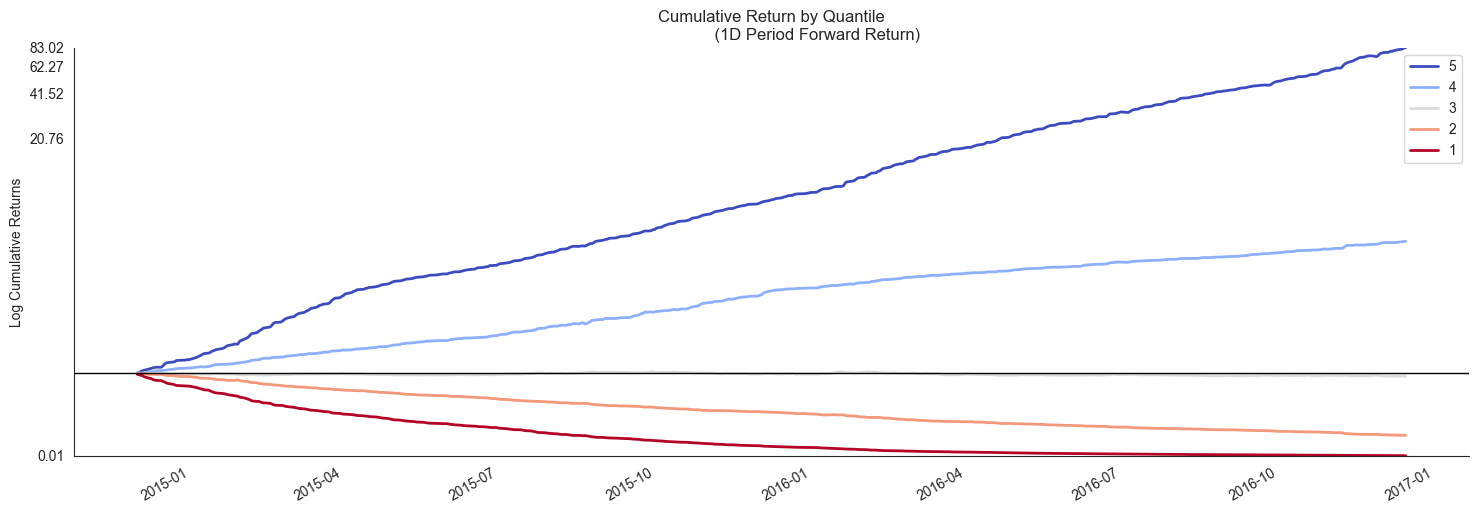

In [36]:
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q_daily['1D'], period='1D')
sns.despine();

By looking at the cumulative returns by factor quantile we can get an intuition for which quantiles are contributing the most to the factor and at what time. Ideally we would like to see a these curves originate at the same value on the left and spread out like a fan as they move to the right through time, with the higher quantiles on the top.

In [37]:
ls_factor_returns = alphalens.performance.factor_returns(factor_data)

In [38]:
ls_factor_returns.head()

1D        5D       10D
date                                                   
2014-12-01 00:00:00+00:00  0.009976  0.041804  0.042468
2014-12-02 00:00:00+00:00  0.002301  0.040075  0.047836
2014-12-03 00:00:00+00:00  0.011863  0.044303  0.043278
2014-12-04 00:00:00+00:00  0.005201  0.040933  0.030355
2014-12-05 00:00:00+00:00  0.009203  0.046755  0.032790

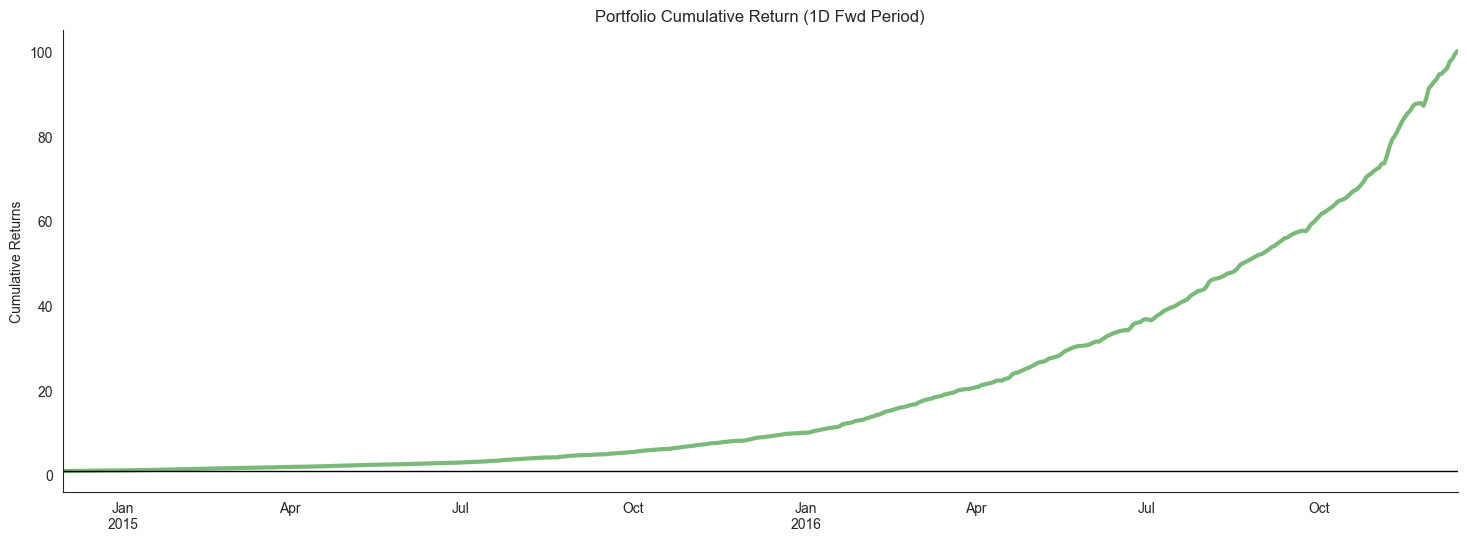

In [39]:
alphalens.plotting.plot_cumulative_returns(ls_factor_returns['1D'], 
                                           period='1D')
sns.despine();

While looking at quantiles is important we must also look at the factor returns as a whole. The cumulative factor long/short returns plot lets us view the combined effects overtime of our entire factor.

In [40]:
alpha_beta = alphalens.performance.factor_alpha_beta(factor_data)

In [41]:
alpha_beta

1D        5D       10D
Ann. alpha  8.448265  7.795838  1.960041
beta        0.093680  0.076216  0.058176

A very important part of factor returns analysis is determing the alpha, and how significant it is. Here we surface the annualized alpha, and beta.

## Returns Tear Sheet

We can view all returns analysis calculations together.

Returns Analysis


1D       5D     10D
Ann. alpha                                       8.448    7.796   1.960
beta                                             0.094    0.076   0.058
Mean Period Wise Return Top Quantile (bps)      86.161   82.882  41.492
Mean Period Wise Return Bottom Quantile (bps)  -84.540  -82.058 -41.027
Mean Period Wise Spread (bps)                  170.701  164.946  82.538

<Figure size 640x480 with 0 Axes>

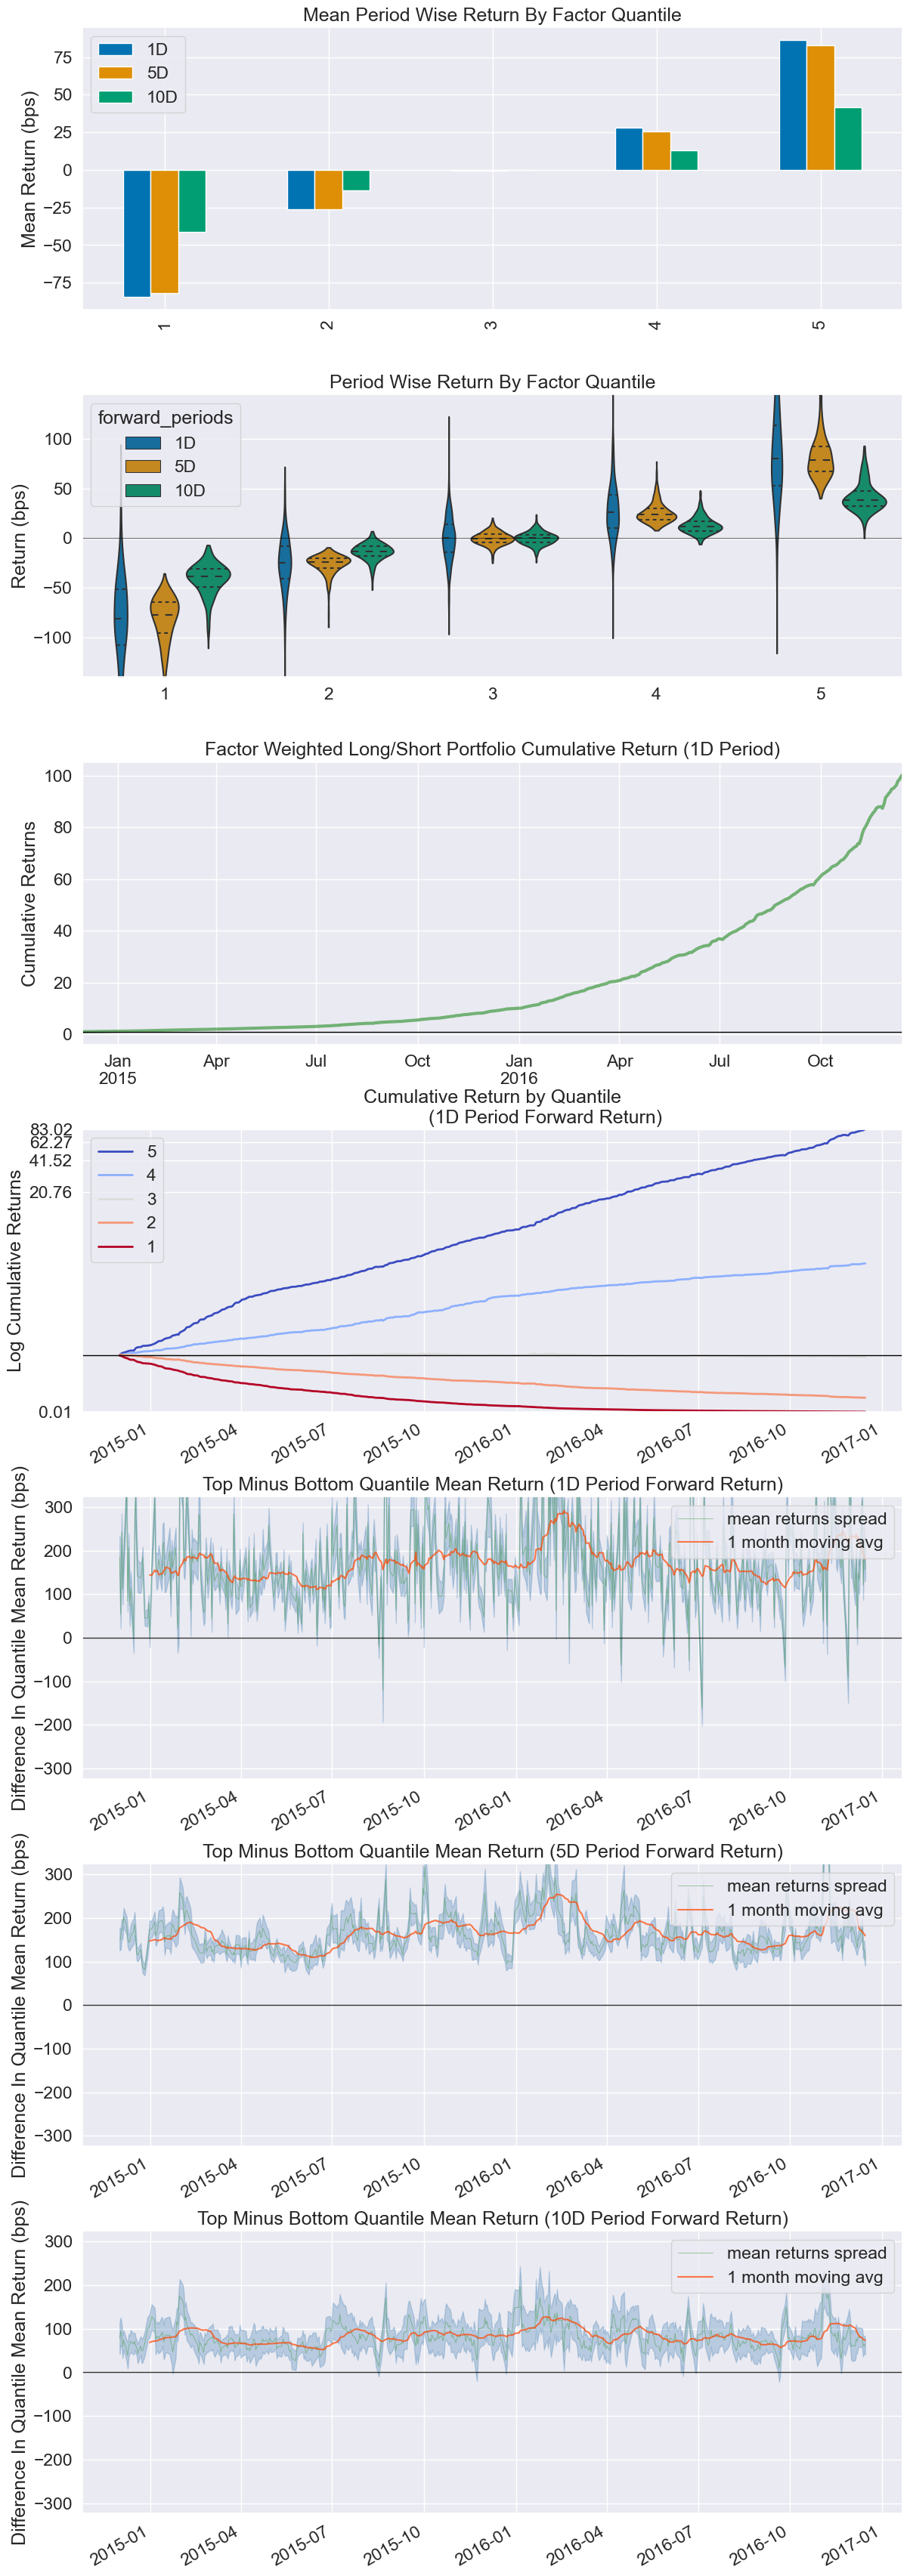

In [42]:
alphalens.tears.create_returns_tear_sheet(factor_data);

# Information Analysis

Information Analysis is a way for us to evaluate the predicitive value of a factor without the confounding effects of transaction costs. The main way we look at this is through the Information Coefficient (IC).

From Wikipedia...

>The information coefficient (IC) is a measure of the merit of a predicted value. In finance, the information coefficient is used as a performance metric for the predictive skill of a financial analyst. The information coefficient is similar to correlation in that it can be seen to measure the linear relationship between two random variables, e.g. predicted stock returns and the actualized returns. The information coefficient ranges from 0 to 1, with 0 denoting no linear relationship between predictions and actual values (poor forecasting skills) and 1 denoting a perfect linear relationship (good forecasting skills).

## Performance Metrics & Plotting Functions

In [43]:
ic = alphalens.performance.factor_information_coefficient(factor_data)

In [44]:
ic.head()

1D   5D       10D
date                                              
2014-12-01 00:00:00+00:00  0.361301  1.0  0.551442
2014-12-02 00:00:00+00:00  0.198606  1.0  0.731324
2014-12-03 00:00:00+00:00  0.480568  1.0  0.732740
2014-12-04 00:00:00+00:00  0.329058  1.0  0.661542
2014-12-05 00:00:00+00:00  0.478303  1.0  0.764183

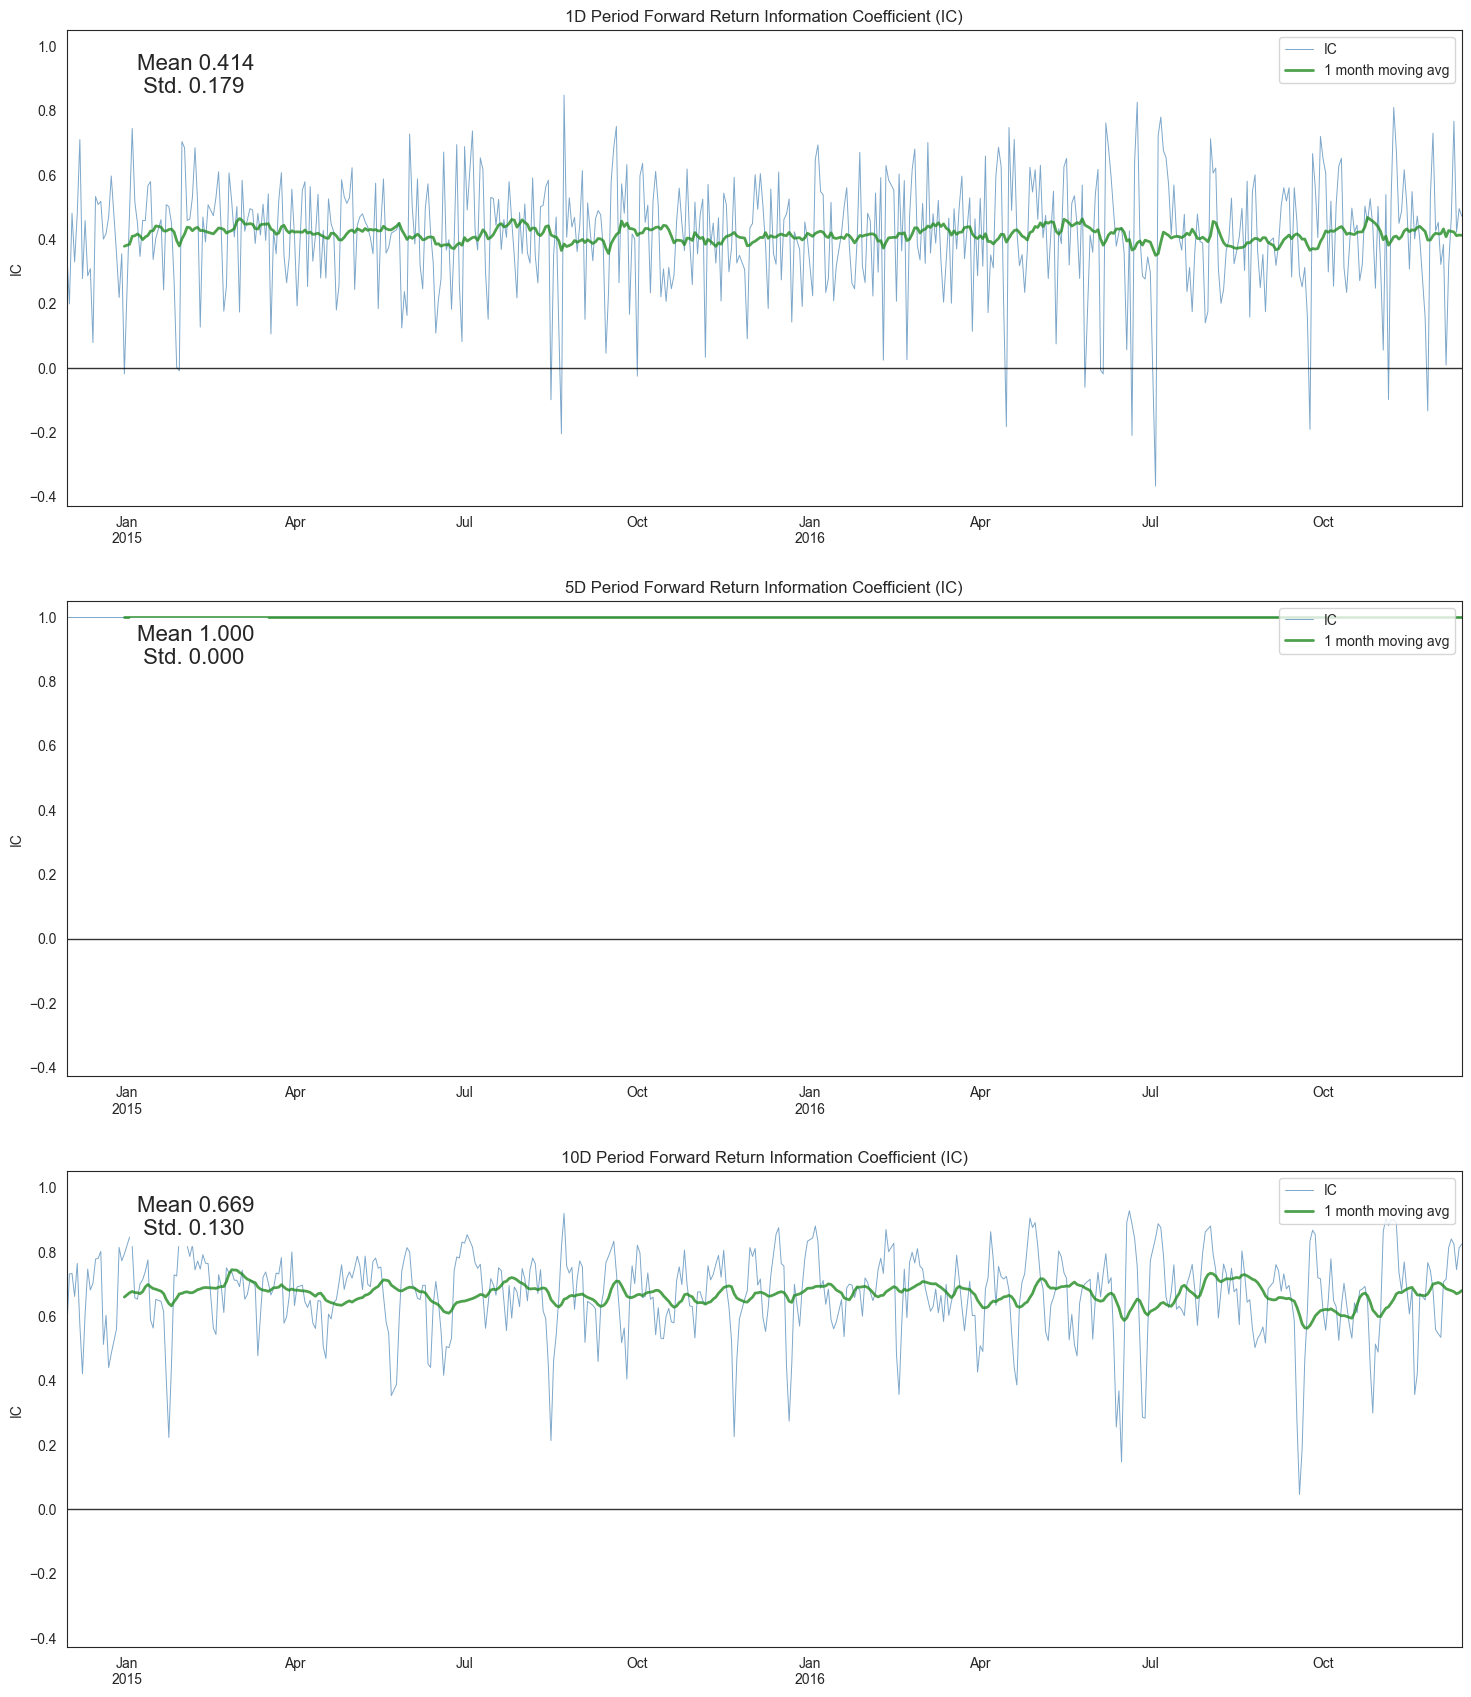

In [45]:
alphalens.plotting.plot_ic_ts(ic);

By looking at the IC each day we can understand how theoretically predicitive our factor is overtime. We like our mean IC to be high and the standard deviation, or volatility of it, to be low. We want to find consistently predictive factors.

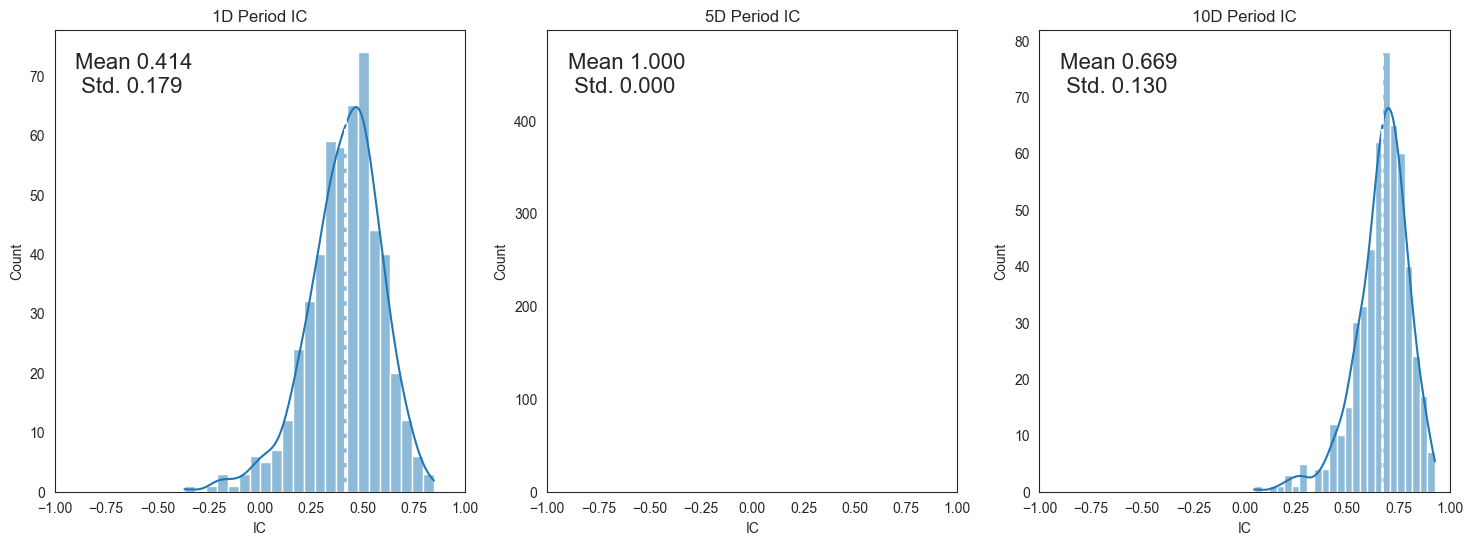

In [46]:
alphalens.plotting.plot_ic_hist(ic);

Looking at a histogram of the daily IC values can indicate how the factor behaves most of the time, where the likely IC values will fall, it also allows us to see if the factor has fat tails.

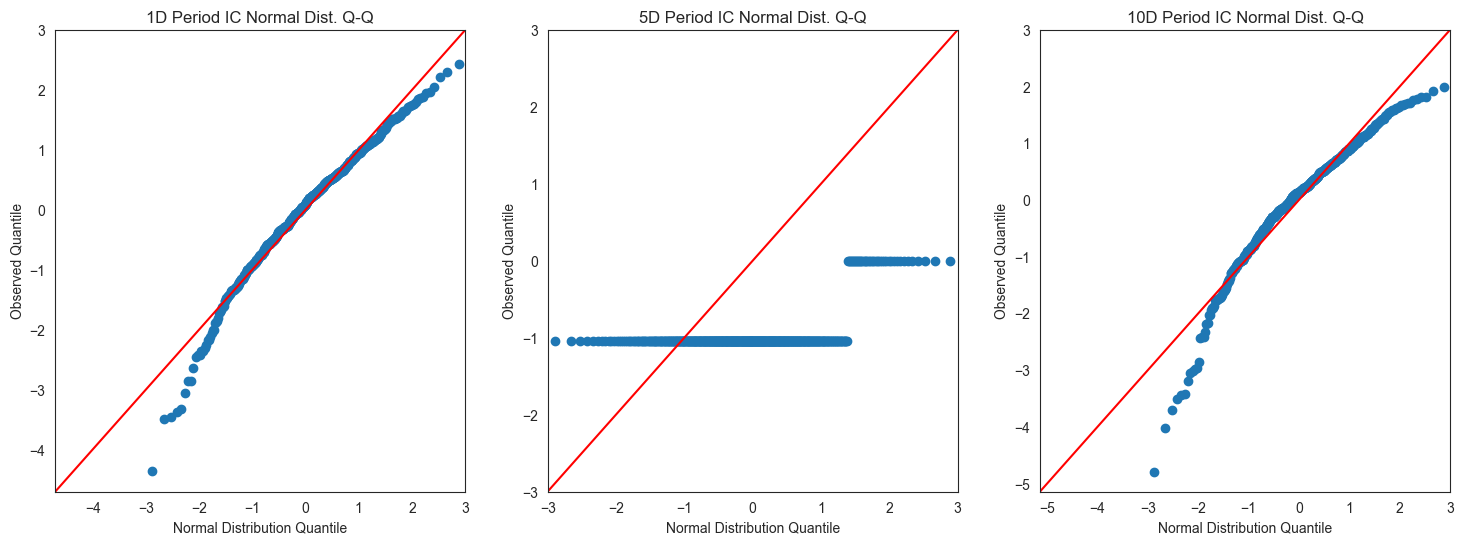

In [47]:
alphalens.plotting.plot_ic_qq(ic);

These Q-Q plots show the difference in shape between the distribution of IC values and a normal distribution. This is especially helpful in seeing how the most extreme values in the distribution affect the predicitive power.

In [48]:
mean_monthly_ic = alphalens.performance.mean_information_coefficient(factor_data, 
                                                                     by_time='M')

In [49]:
mean_monthly_ic.head()

1D   5D       10D
date                                              
2014-12-31 00:00:00+00:00  0.377997  1.0  0.659597
2015-01-31 00:00:00+00:00  0.423967  1.0  0.659806
2015-02-28 00:00:00+00:00  0.464588  1.0  0.733637
2015-03-31 00:00:00+00:00  0.426206  1.0  0.684659
2015-04-30 00:00:00+00:00  0.419049  1.0  0.640393

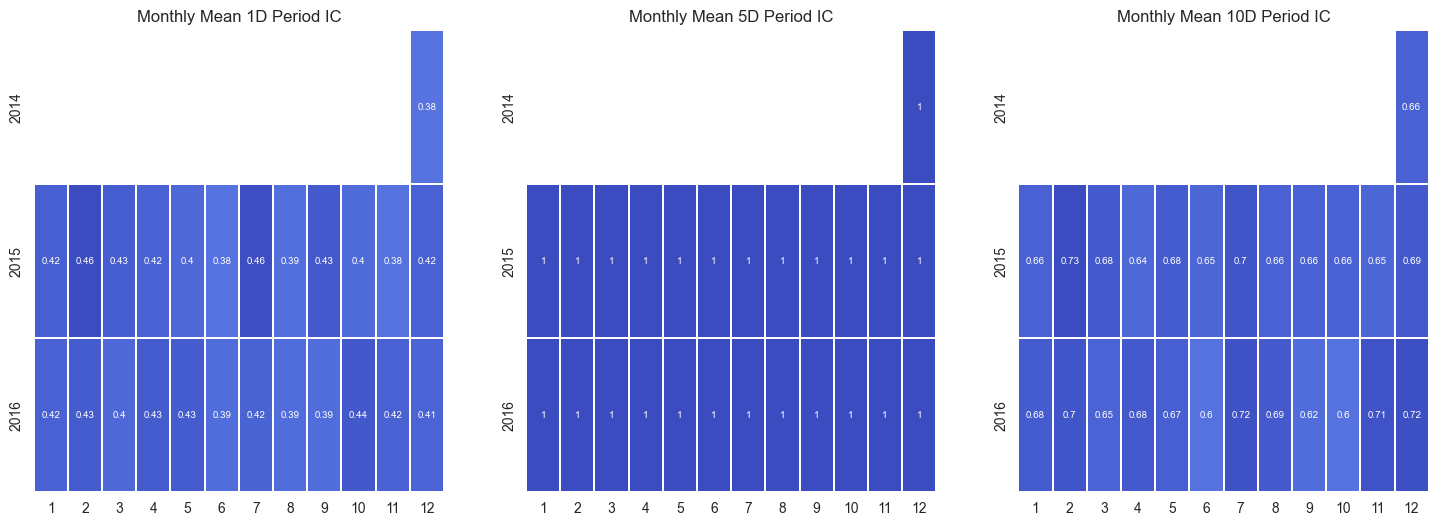

In [50]:
alphalens.plotting.plot_monthly_ic_heatmap(mean_monthly_ic);

By displaying the IC data in heatmap format we can get an idea about the consistency of the factor, and how it behaves during different market regimes/seasons.

## Information Tear Sheet

We can view all information analysis calculations together.

Information Analysis


1D            5D      10D
IC Mean            0.414  1.000000e+00    0.669
IC Std.            0.179  0.000000e+00    0.130
Risk-Adjusted IC   2.309  9.388673e+15    5.155
t-stat(IC)        52.454  2.132697e+17  117.090
p-value(IC)        0.000  0.000000e+00    0.000
IC Skew           -0.716  0.000000e+00   -1.079
IC Kurtosis        1.208 -3.000000e+00    2.222

<Figure size 640x480 with 0 Axes>

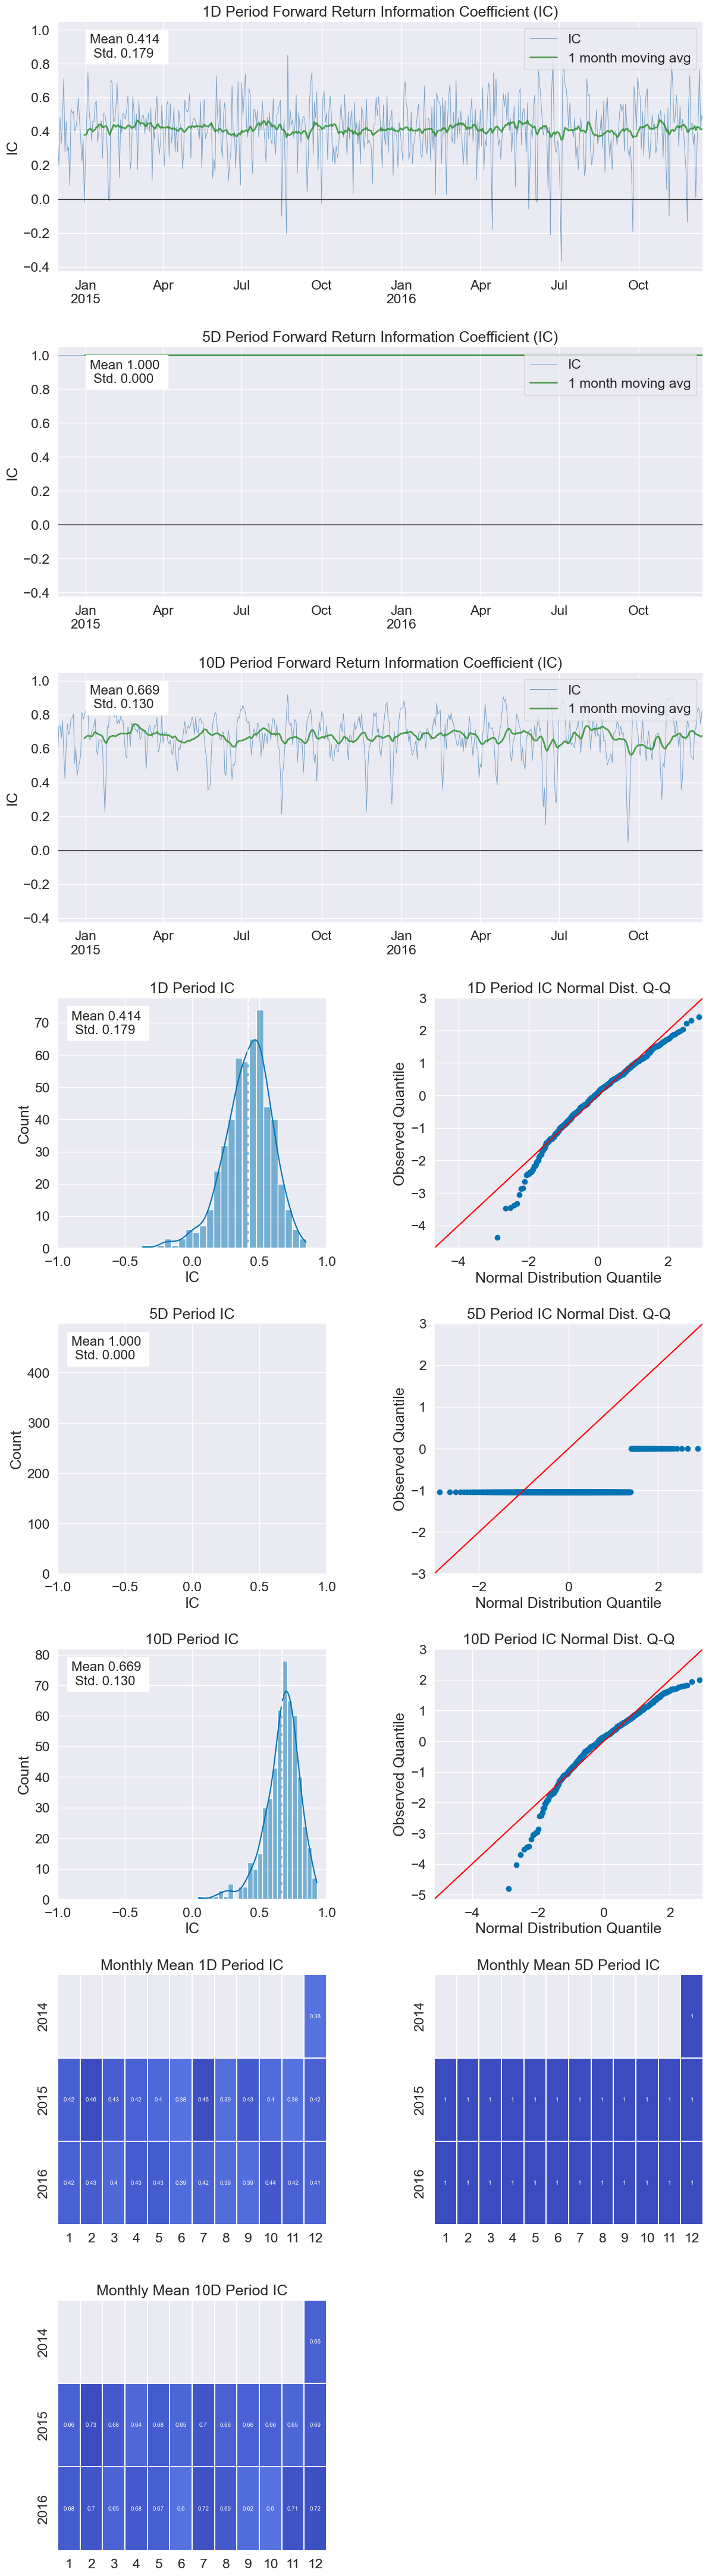

In [51]:
alphalens.tears.create_information_tear_sheet(factor_data);

# Turnover Analysis

Turnover Analysis gives us an idea about the nature of a factor's makeup and how it changes.

## Performance Metrics & Plotting Functions

In [52]:
quantile_factor = factor_data['factor_quantile']
turnover_period = 1

In [53]:
quantiles = range(1, int(quantile_factor.max()) + 1)
quantile_turnover = pd.concat([alphalens.performance.quantile_turnover(quantile_factor, q, 
                                                                       turnover_period)
                               for q in quantiles], axis=1)

In [54]:
quantile_turnover.head()

1         2         3         4         5
date                                                                      
2014-12-01 00:00:00+00:00      NaN       NaN       NaN       NaN       NaN
2014-12-02 00:00:00+00:00  0.31250  0.645161  0.709677  0.483871  0.451613
2014-12-03 00:00:00+00:00  0.15625  0.354839  0.548387  0.516129  0.419355
2014-12-04 00:00:00+00:00  0.21875  0.580645  0.741935  0.709677  0.419355
2014-12-05 00:00:00+00:00  0.12500  0.322581  0.580645  0.548387  0.580645

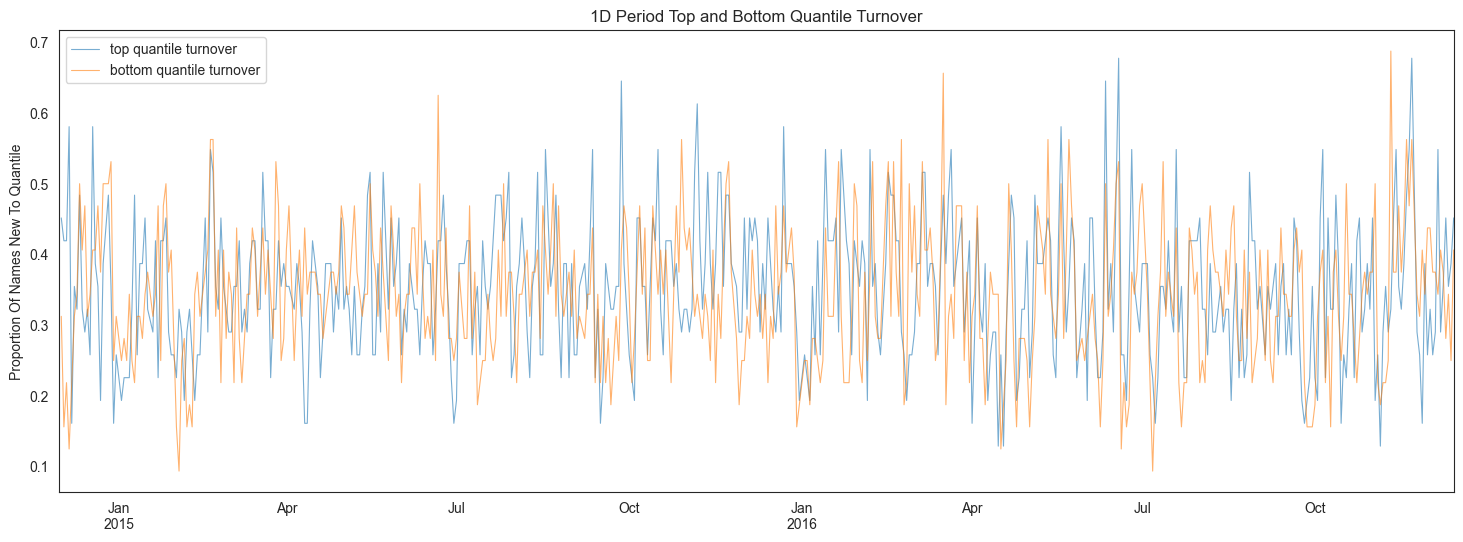

In [55]:
alphalens.plotting.plot_top_bottom_quantile_turnover(quantile_turnover, 
                                                     turnover_period);

Factor turnover is important as it indicates the incorporation of new information and the make up of the extremes of a signal. By looking at the new additions to the sets of top and bottom quantiles we can see how much of this factor is getting remade everyday.

In [56]:
factor_autocorrelation = alphalens.performance.factor_rank_autocorrelation(factor_data, 
                                                                           turnover_period)

In [57]:
factor_autocorrelation.head()

date
2014-12-01 00:00:00+00:00         NaN
2014-12-02 00:00:00+00:00    0.697156
2014-12-03 00:00:00+00:00    0.866786
2014-12-04 00:00:00+00:00    0.739422
2014-12-05 00:00:00+00:00    0.804157
Freq: C, Name: 1, dtype: float64

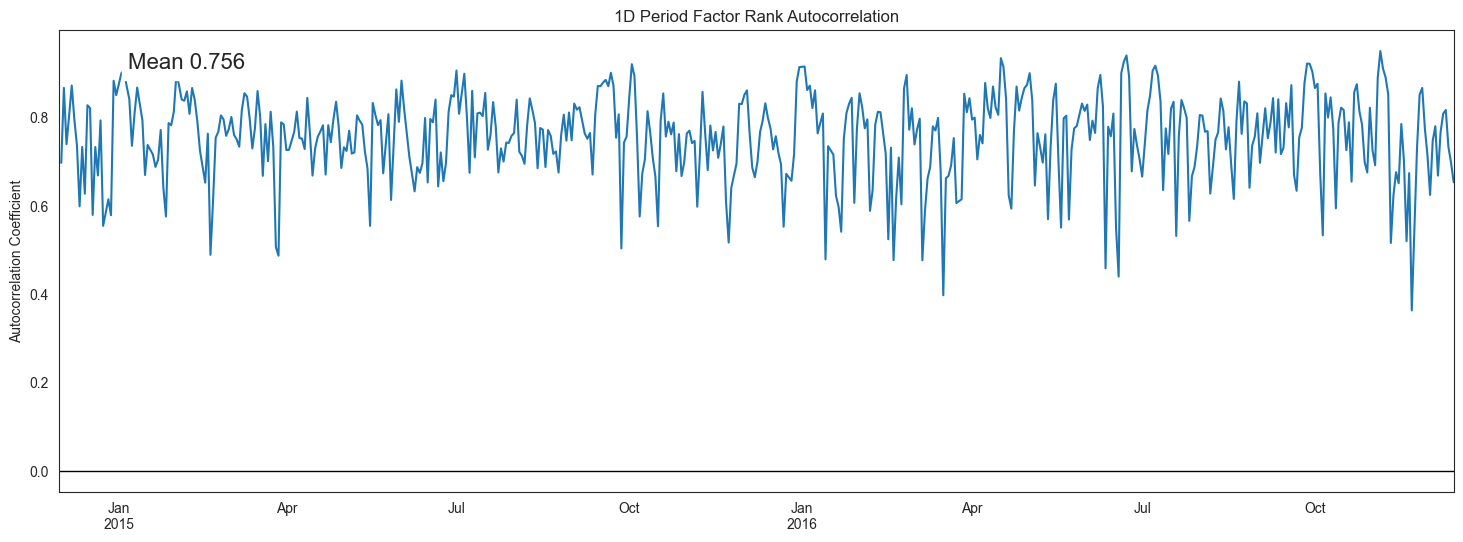

In [58]:
alphalens.plotting.plot_factor_rank_auto_correlation(factor_autocorrelation);

The autocorrelation of the factor indicates to us the persistence of the signal itself.

## Turnover Tear Sheet

We can view all turnover calculations together.

Turnover Analysis


1D     5D    10D
Quantile 1 Mean Turnover   0.341  0.765  0.784
Quantile 2 Mean Turnover   0.600  0.789  0.797
Quantile 3 Mean Turnover   0.641  0.785  0.786
Quantile 4 Mean Turnover   0.603  0.788  0.799
Quantile 5 Mean Turnover   0.352  0.787  0.796

1D   5D   10D
Mean Factor Rank Autocorrelation  0.756 -0.0 -0.03

<Figure size 640x480 with 0 Axes>

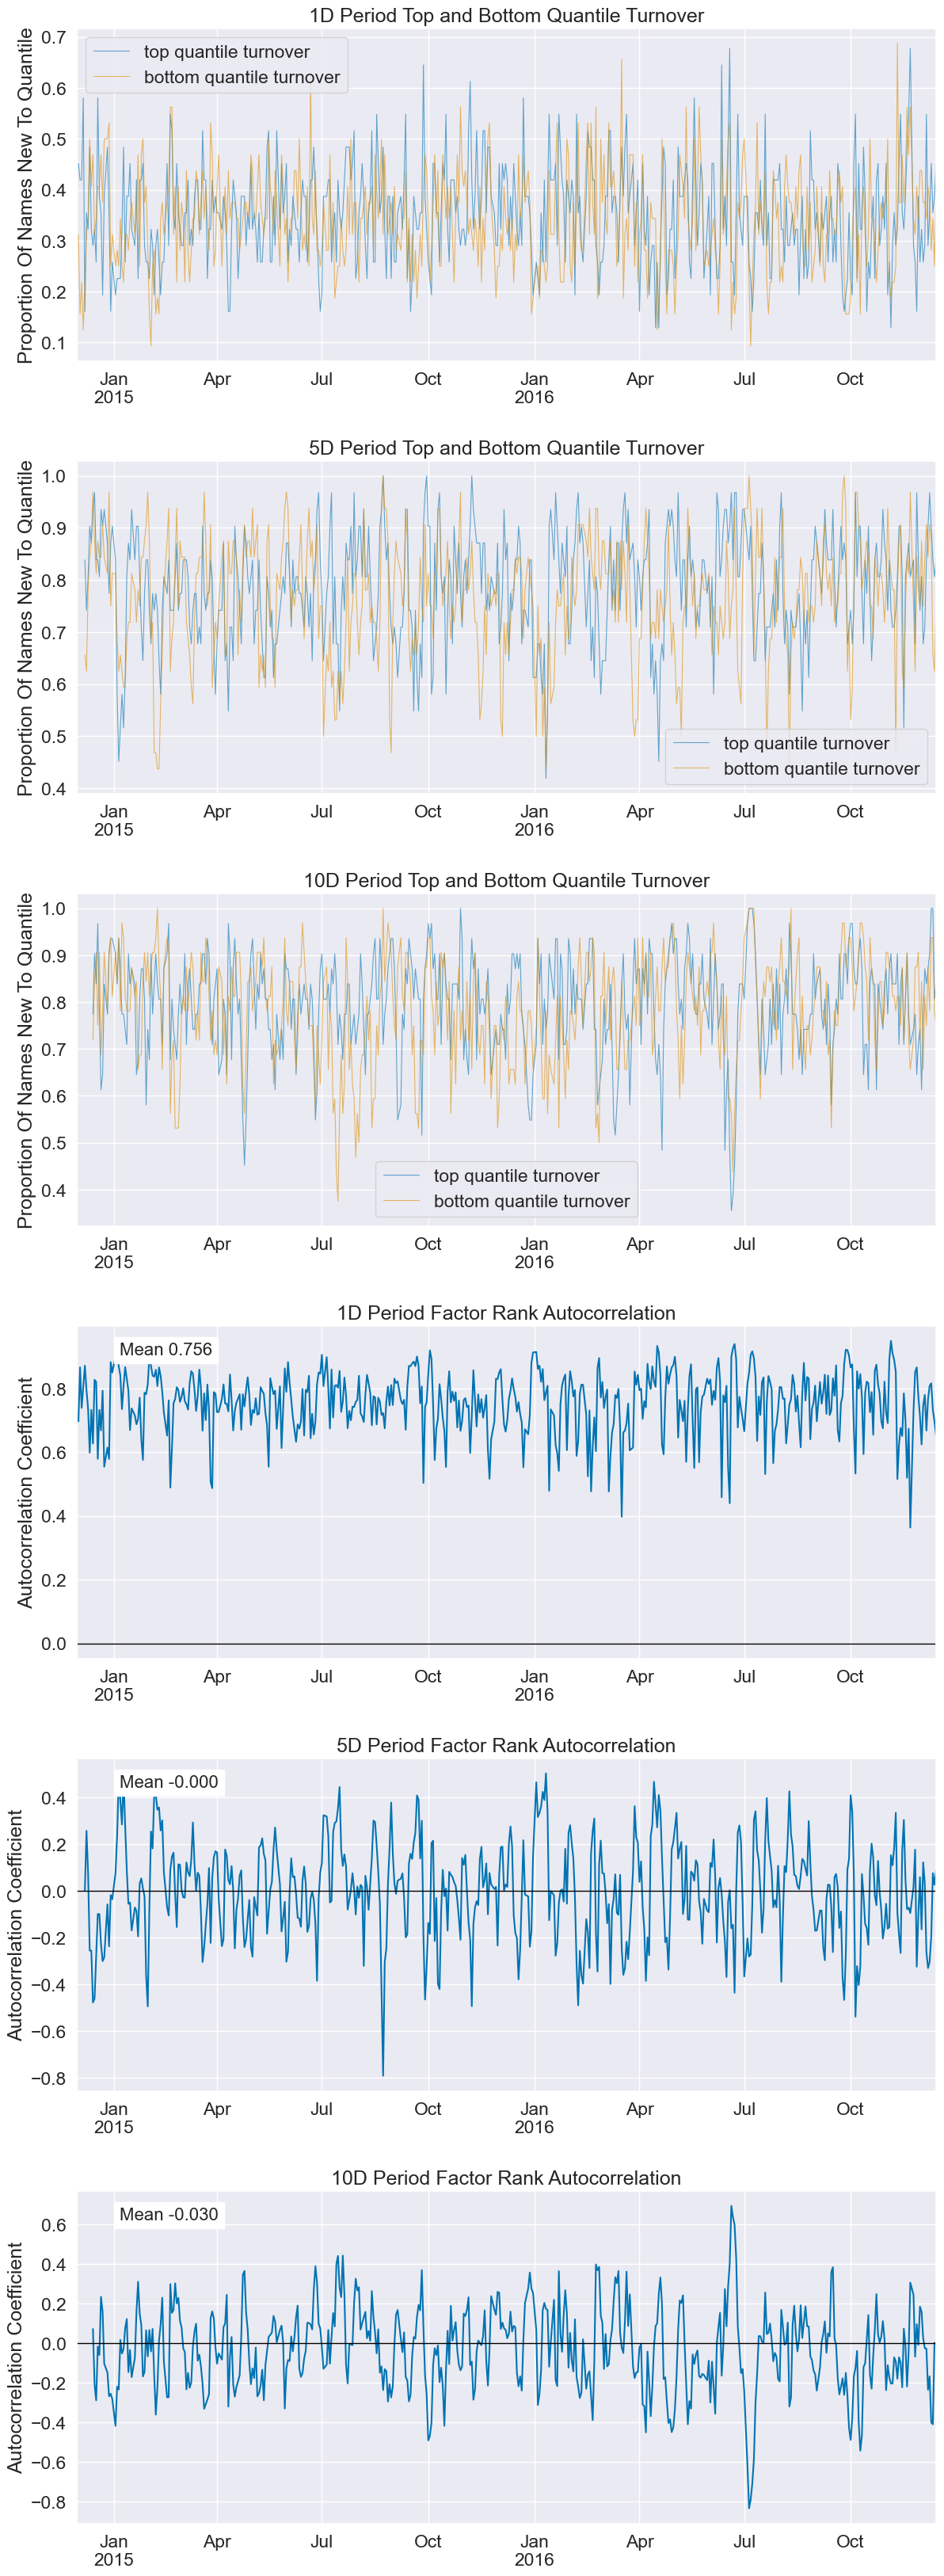

In [59]:
alphalens.tears.create_turnover_tear_sheet(factor_data);

# Event Style Returns Analysis

Looking at the average cumulative return in a window before and after a factor can indicate to us how long the predicative power of a factor lasts. This tear sheet takes a while to run.

**NOTE:** This tear sheet takes in an extra argument `pricing`.

<Figure size 640x480 with 0 Axes>

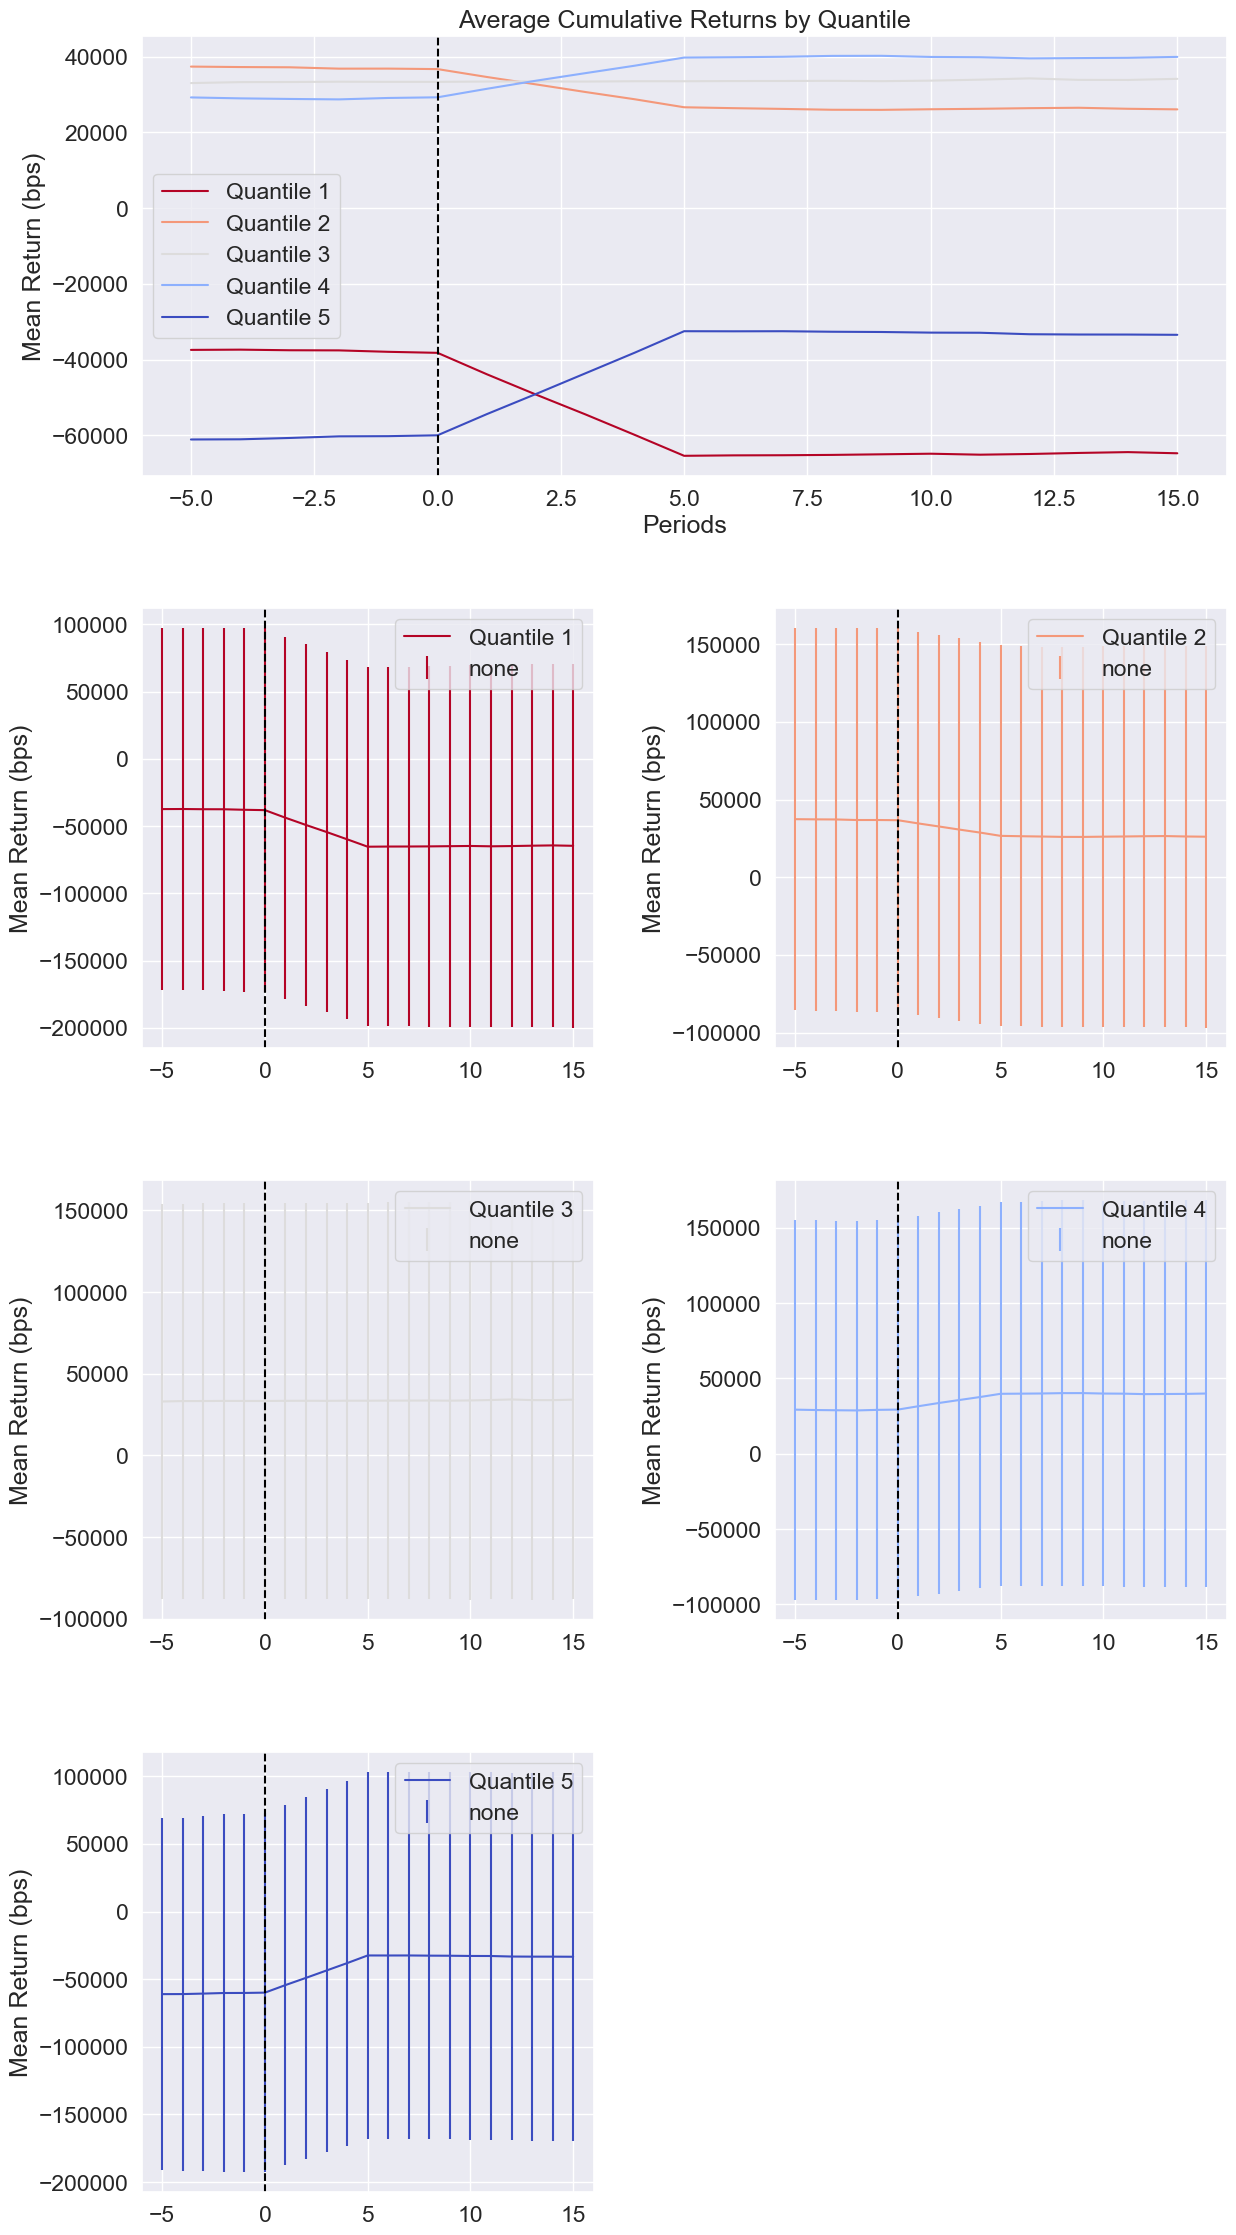

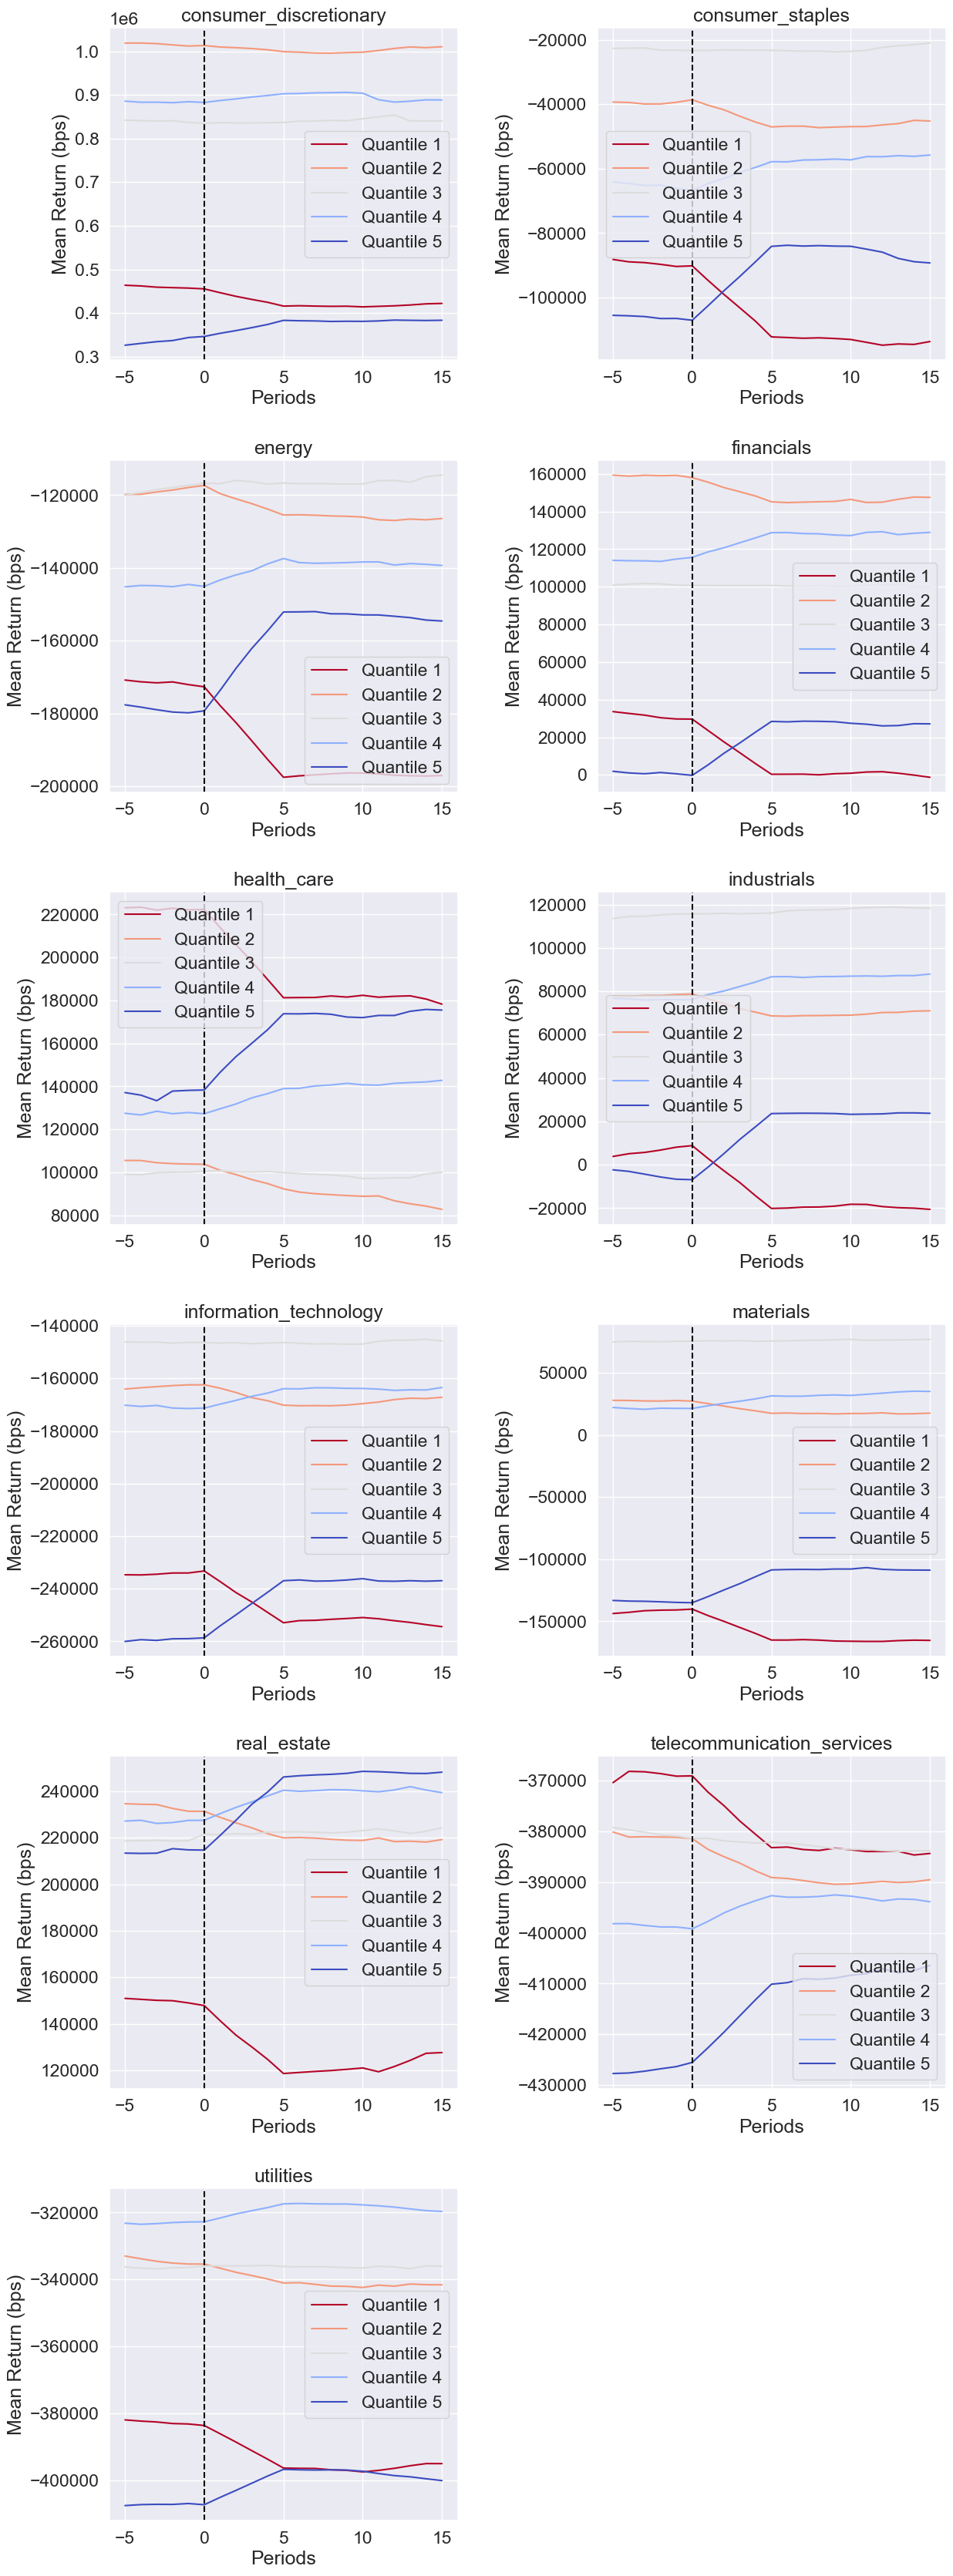

In [60]:
alphalens.tears.create_event_returns_tear_sheet(factor_data, 
                                                pricing, 
                                                by_group=True);

# Groupwise Performance

Many of the plots in Alphalens can be viewed on their own by grouping if grouping information is provided. The returns and information tear sheets can be viewed groupwise by passing in the `by_group=True` argument.

In [61]:
ic_by_sector = alphalens.performance.mean_information_coefficient(factor_data, 
                                                                  by_group=True)

In [62]:
ic_by_sector.head()

1D   5D       10D
group                                          
consumer_discretionary  0.376525  1.0  0.630168
consumer_staples        0.388736  1.0  0.645816
energy                  0.380559  1.0  0.634670
financials              0.404388  1.0  0.648418
health_care             0.382928  1.0  0.625709

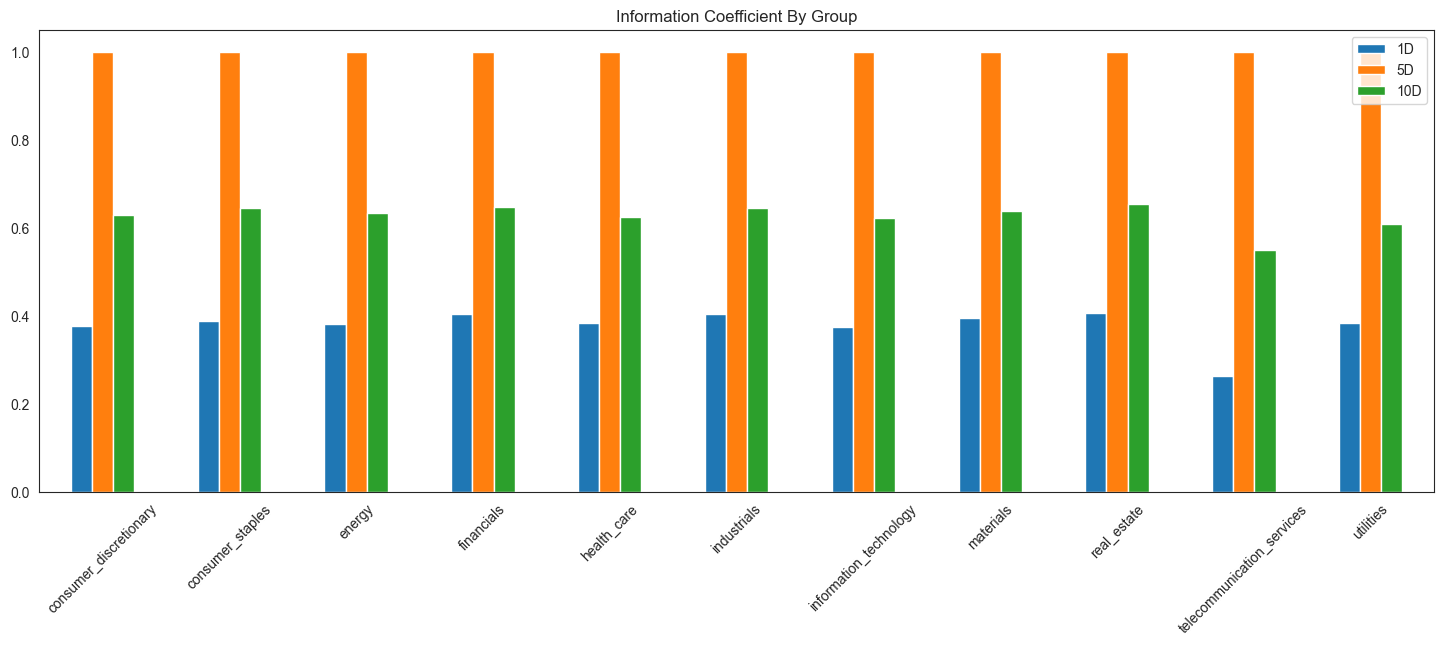

In [63]:
alphalens.plotting.plot_ic_by_group(ic_by_sector);

In [64]:
mean_return_quantile_sector, mean_return_quantile_sector_err = alphalens.performance.mean_return_by_quantile(factor_data, 
                                                                                                             by_group=True)

In [65]:
mean_return_quantile_sector.head()

1D        5D       10D
factor_quantile group                                               
1               consumer_discretionary -0.008352 -0.041817 -0.041817
                consumer_staples       -0.007354 -0.034905 -0.036666
                energy                 -0.008990 -0.043452 -0.042014
                financials             -0.007643 -0.038159 -0.039217
                health_care            -0.007844 -0.039761 -0.037542

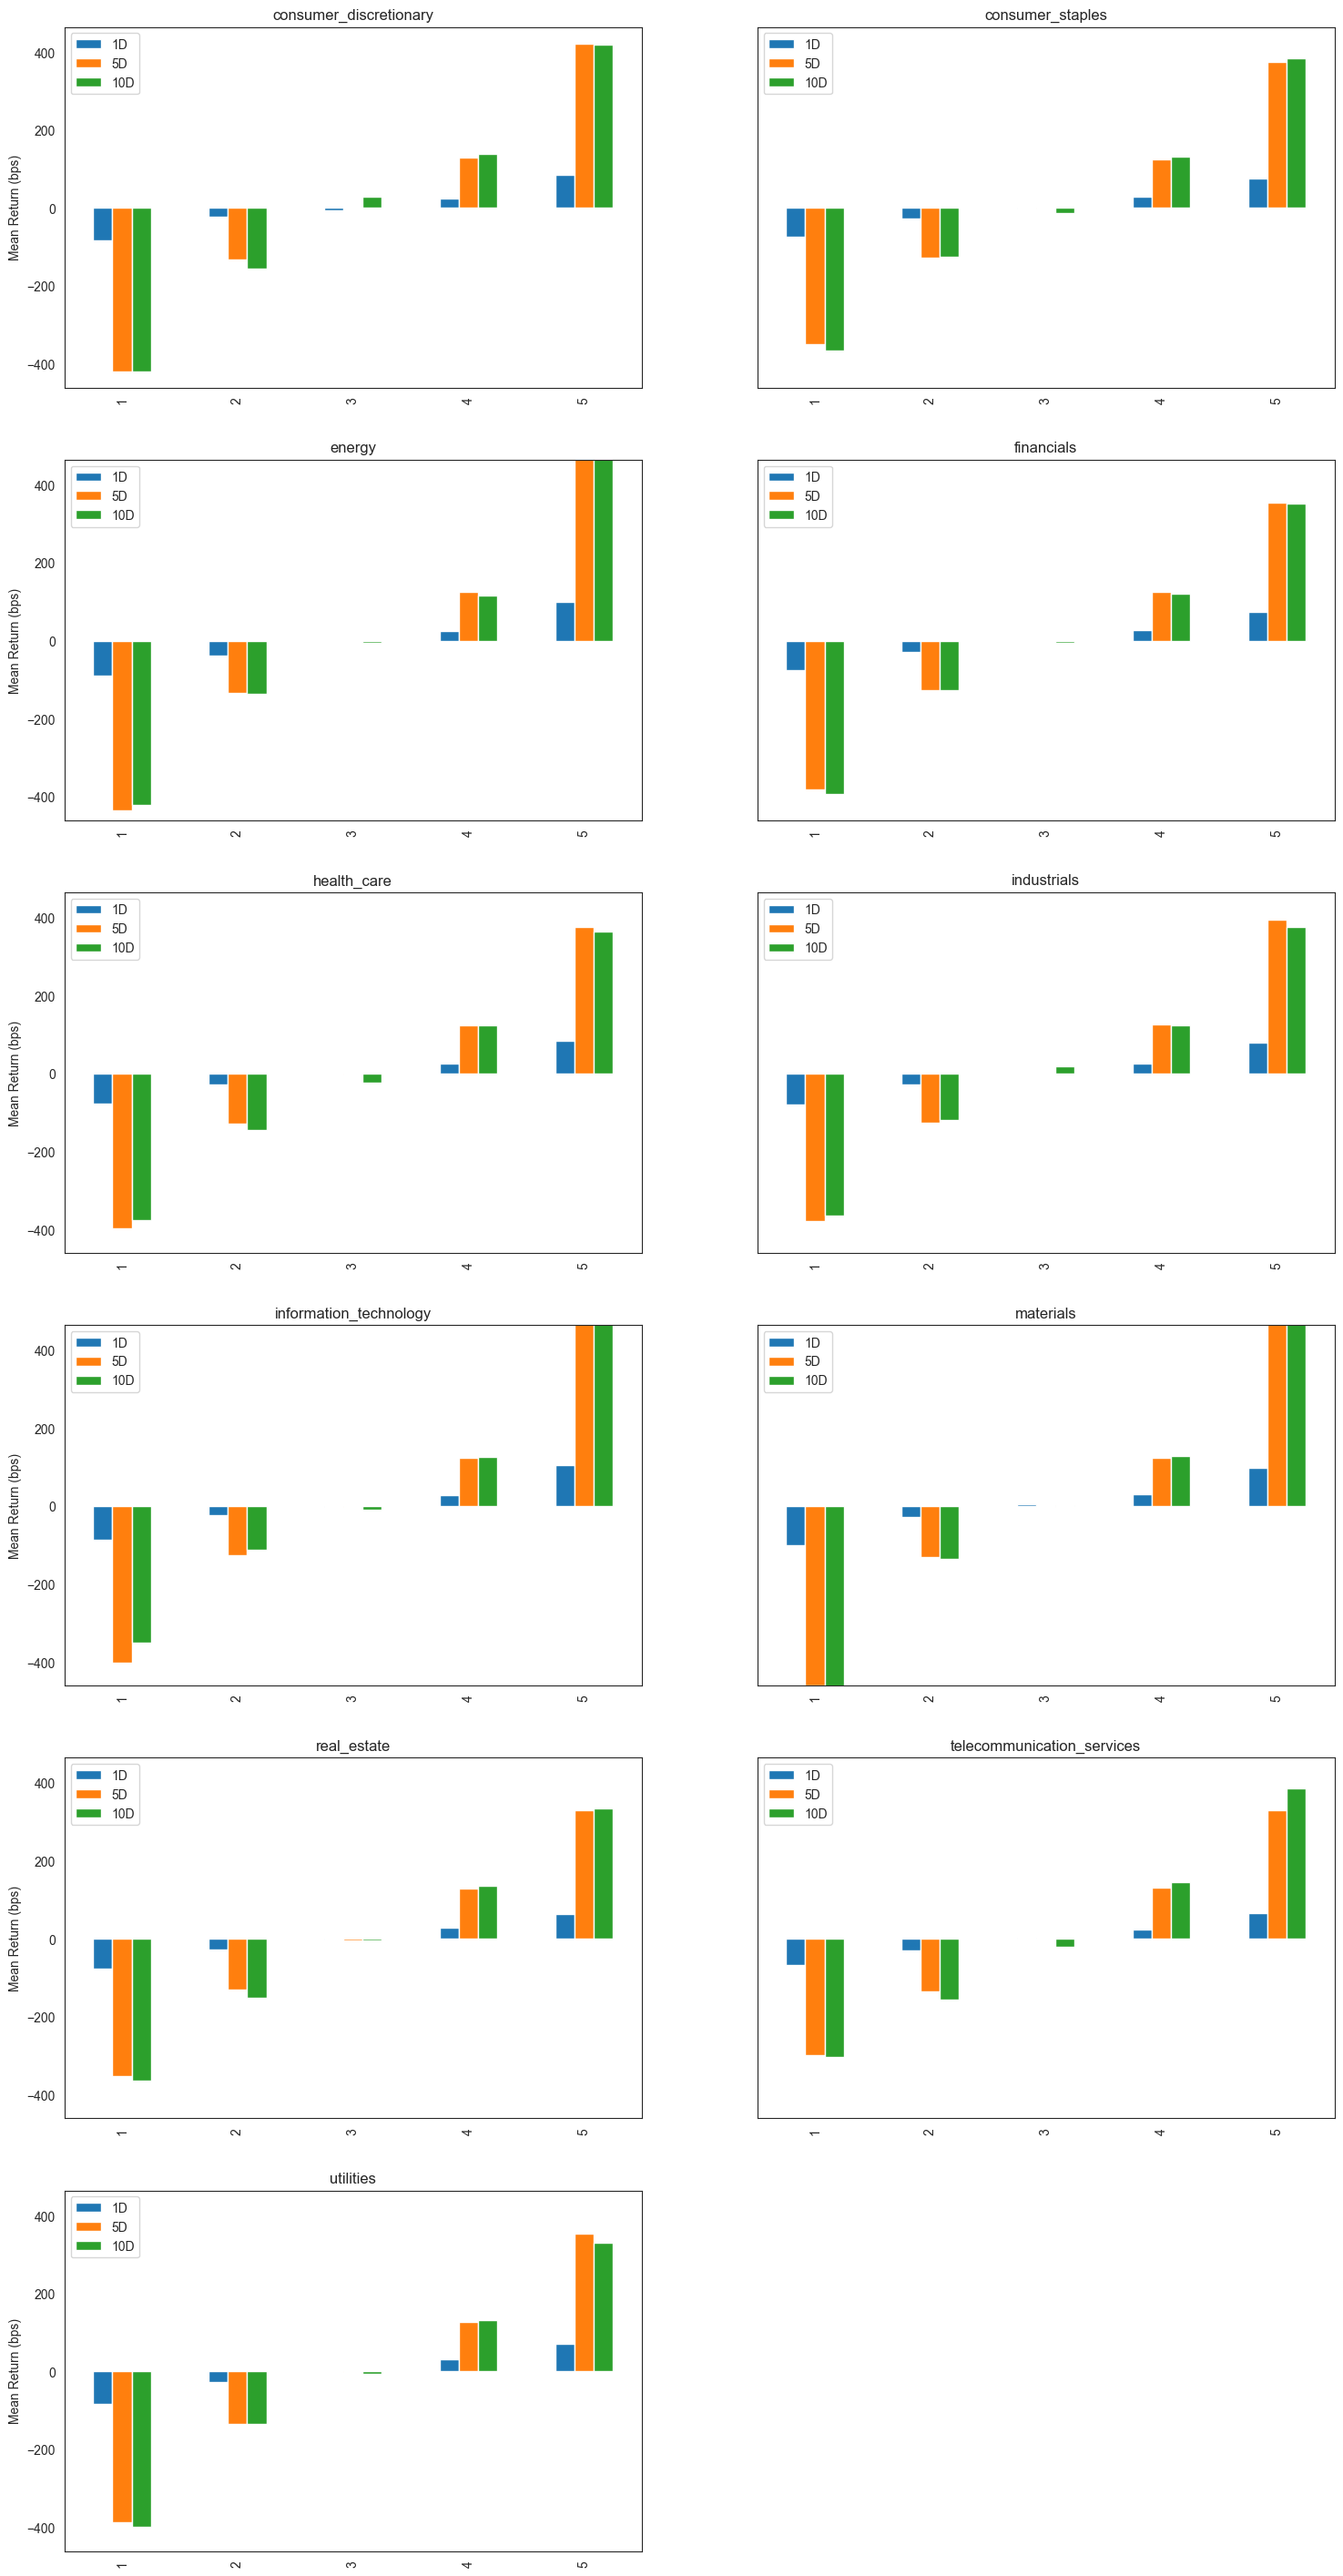

In [66]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_quantile_sector, 
                                             by_group=True);

# Summary Tear Sheet

There are a lot of plots above. If you want a quick snapshot of how the alpha factor performs consider the summary tear sheet.

Quantiles Statistics


min       max      mean       std  count    count %
factor_quantile                                                          
1               -0.362876  0.034876 -0.038604  0.032246  16511  20.511833
2               -0.127445  0.047379 -0.011352  0.019385  15997  19.873284
3               -0.109453  0.067386  0.001602  0.018179  15995  19.870799
4               -0.087170  0.098542  0.014551  0.019136  15996  19.872042
5               -0.061615  0.494950  0.043892  0.036666  15996  19.872042

Returns Analysis


1D       5D     10D
Ann. alpha                                       8.448    7.796   1.960
beta                                             0.094    0.076   0.058
Mean Period Wise Return Top Quantile (bps)      86.161   82.882  41.492
Mean Period Wise Return Bottom Quantile (bps)  -84.540  -82.058 -41.027
Mean Period Wise Spread (bps)                  170.701  164.946  82.538

Information Analysis


1D            5D      10D
IC Mean            0.414  1.000000e+00    0.669
IC Std.            0.179  0.000000e+00    0.130
Risk-Adjusted IC   2.309  9.388673e+15    5.155
t-stat(IC)        52.454  2.132697e+17  117.090
p-value(IC)        0.000  0.000000e+00    0.000
IC Skew           -0.716  0.000000e+00   -1.079
IC Kurtosis        1.208 -3.000000e+00    2.222

Turnover Analysis


1D     5D    10D
Quantile 1 Mean Turnover   0.341  0.765  0.784
Quantile 2 Mean Turnover   0.600  0.789  0.797
Quantile 3 Mean Turnover   0.641  0.785  0.786
Quantile 4 Mean Turnover   0.603  0.788  0.799
Quantile 5 Mean Turnover   0.352  0.787  0.796

1D   5D   10D
Mean Factor Rank Autocorrelation  0.756 -0.0 -0.03

<Figure size 640x480 with 0 Axes>

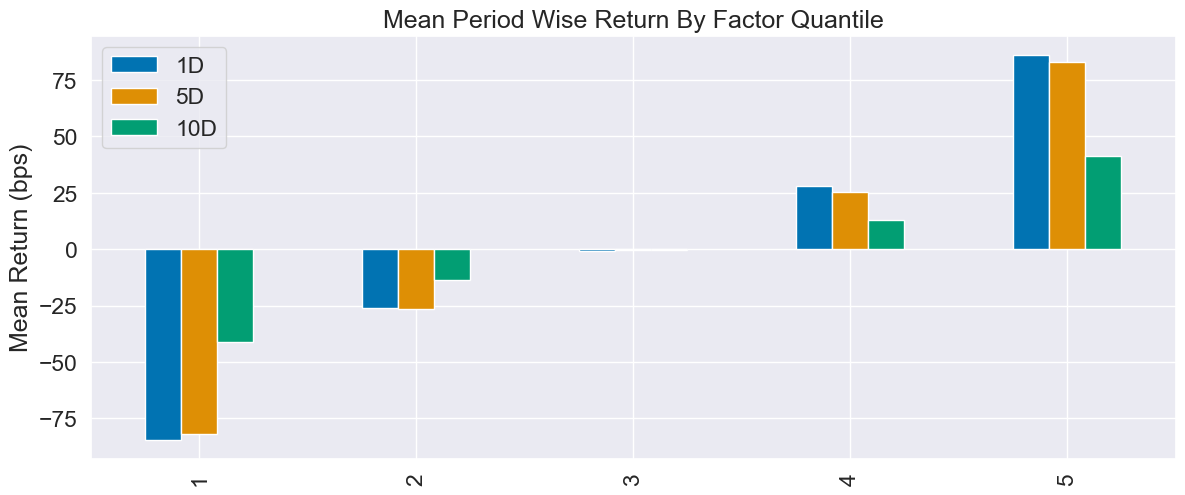

In [67]:
alphalens.tears.create_summary_tear_sheet(factor_data)

# The Whole Thing

If you want to see all of the results create a full tear sheet. By passing in the factor data you can analyze all of the above statistics and plots at once.

Quantiles Statistics


min       max      mean       std  count    count %
factor_quantile                                                          
1               -0.362876  0.034876 -0.038604  0.032246  16511  20.511833
2               -0.127445  0.047379 -0.011352  0.019385  15997  19.873284
3               -0.109453  0.067386  0.001602  0.018179  15995  19.870799
4               -0.087170  0.098542  0.014551  0.019136  15996  19.872042
5               -0.061615  0.494950  0.043892  0.036666  15996  19.872042

Returns Analysis


1D       5D     10D
Ann. alpha                                       8.448    7.796   1.960
beta                                             0.094    0.076   0.058
Mean Period Wise Return Top Quantile (bps)      86.161   82.882  41.492
Mean Period Wise Return Bottom Quantile (bps)  -84.540  -82.058 -41.027
Mean Period Wise Spread (bps)                  170.701  164.946  82.538

<Figure size 640x480 with 0 Axes>

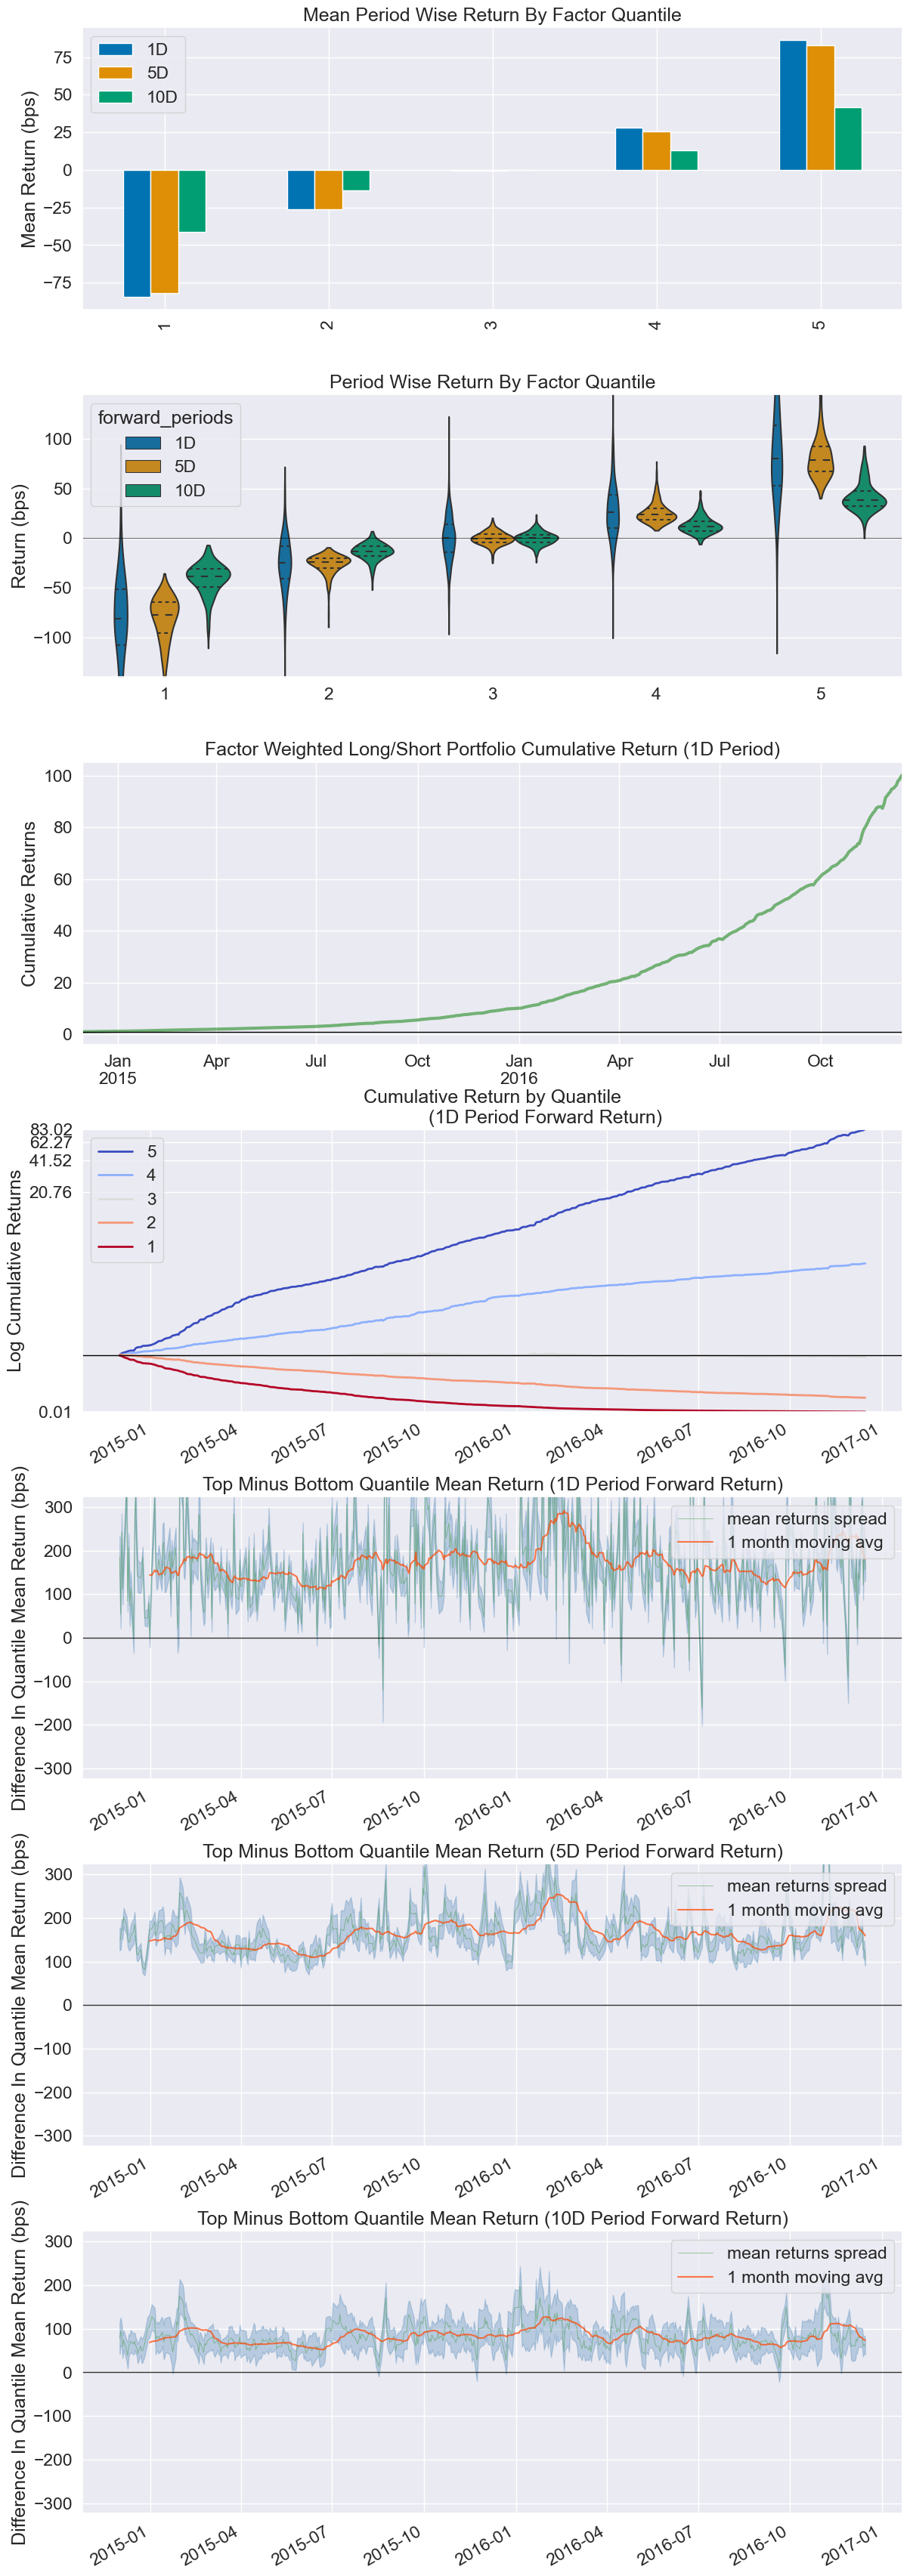

Information Analysis


1D            5D      10D
IC Mean            0.414  1.000000e+00    0.669
IC Std.            0.179  0.000000e+00    0.130
Risk-Adjusted IC   2.309  9.388673e+15    5.155
t-stat(IC)        52.454  2.132697e+17  117.090
p-value(IC)        0.000  0.000000e+00    0.000
IC Skew           -0.716  0.000000e+00   -1.079
IC Kurtosis        1.208 -3.000000e+00    2.222

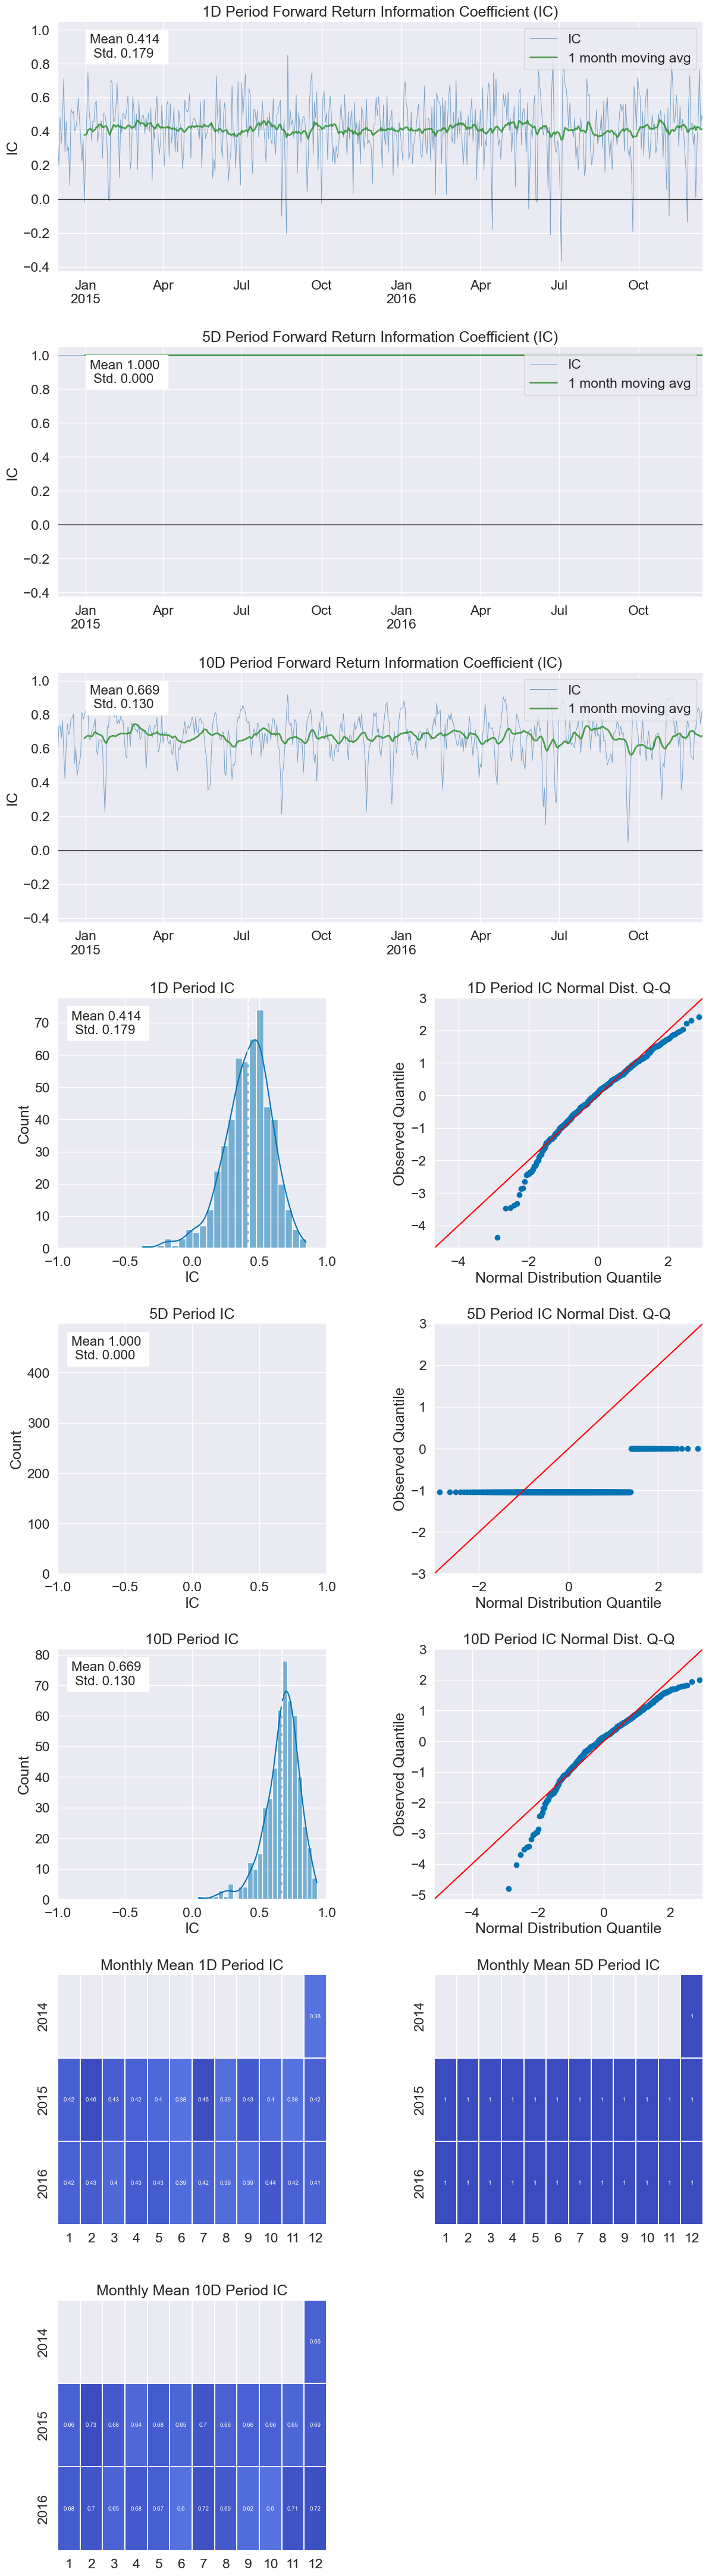

Turnover Analysis


1D     5D    10D
Quantile 1 Mean Turnover   0.341  0.765  0.784
Quantile 2 Mean Turnover   0.600  0.789  0.797
Quantile 3 Mean Turnover   0.641  0.785  0.786
Quantile 4 Mean Turnover   0.603  0.788  0.799
Quantile 5 Mean Turnover   0.352  0.787  0.796

1D   5D   10D
Mean Factor Rank Autocorrelation  0.756 -0.0 -0.03

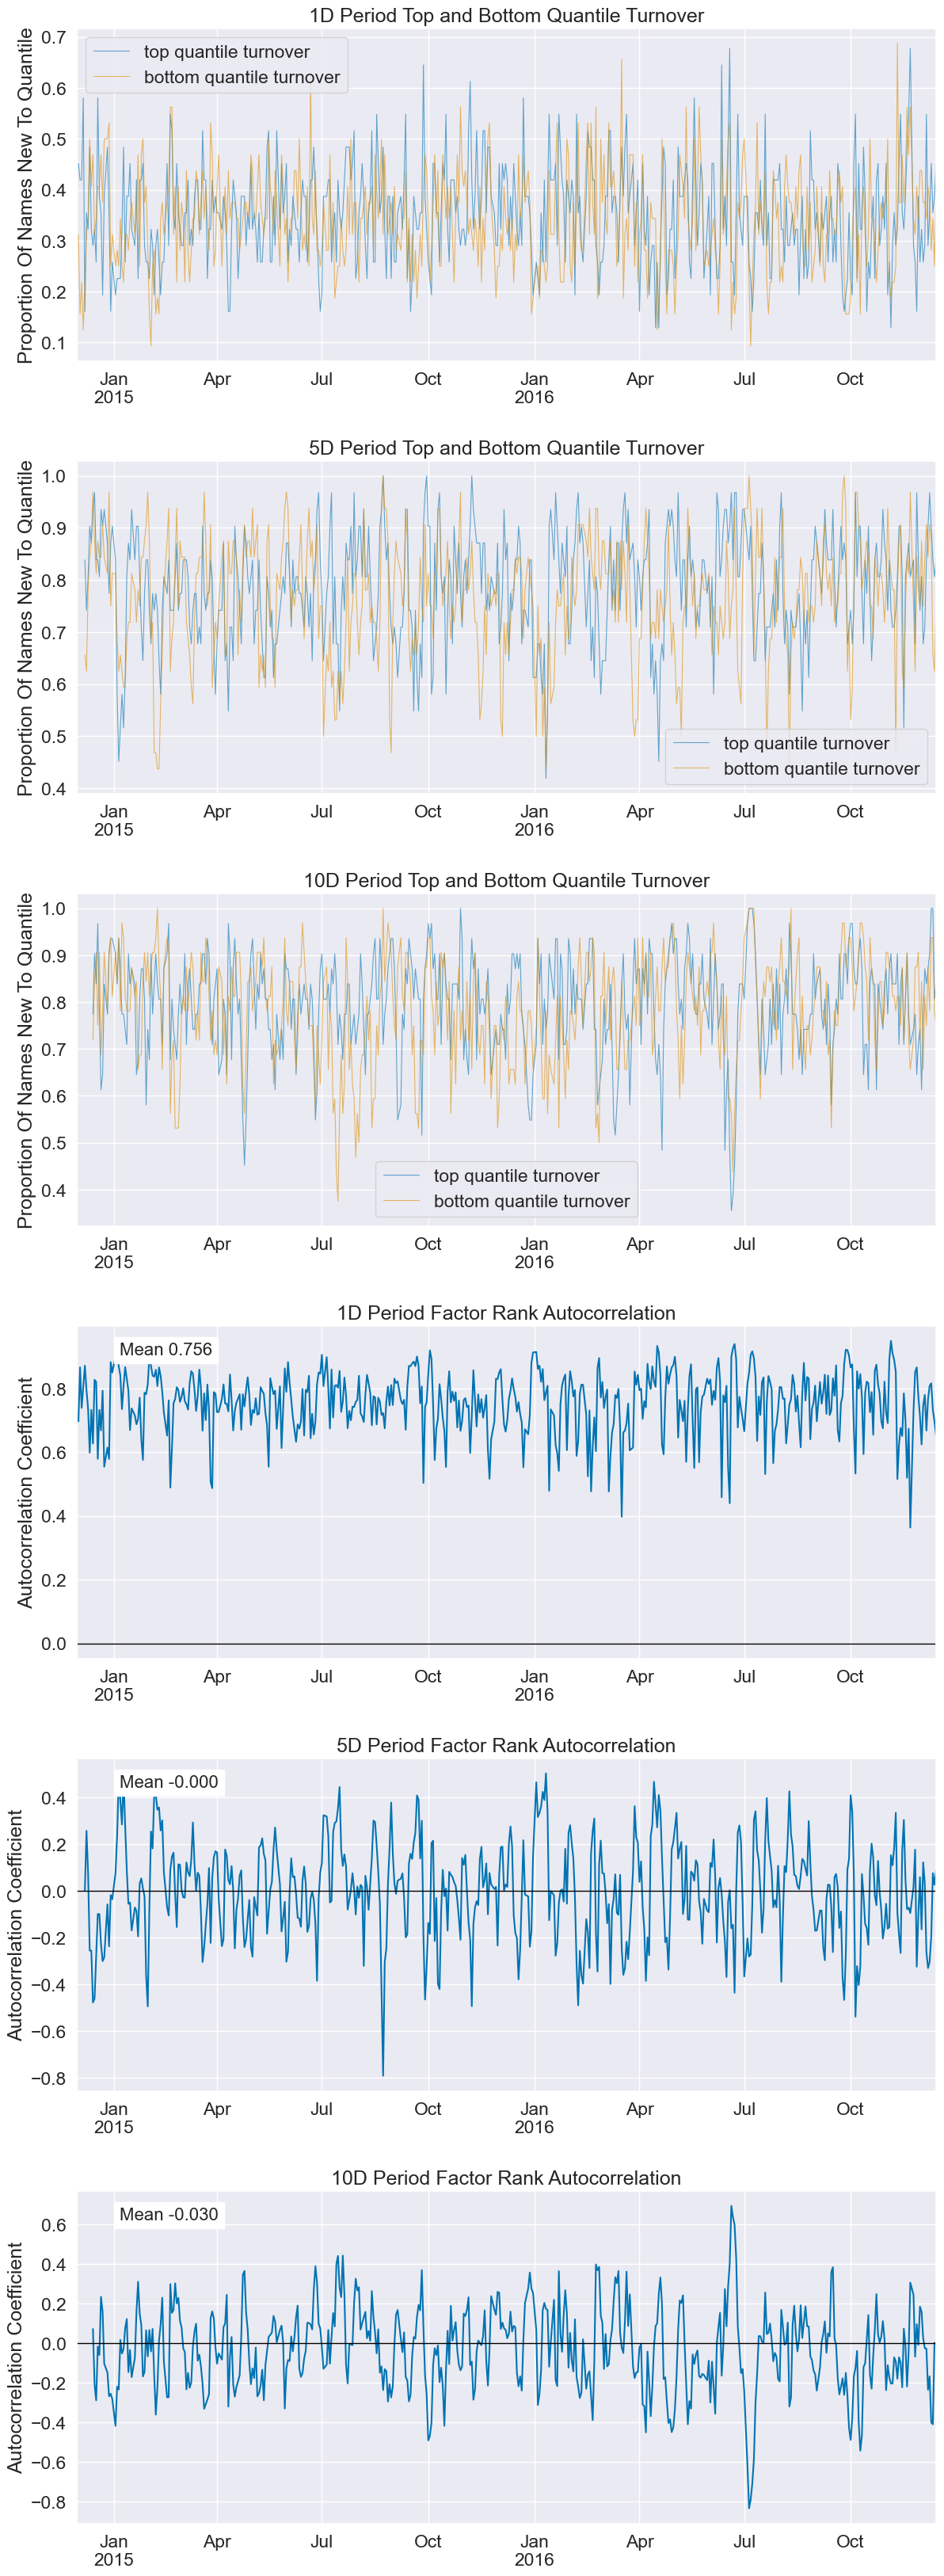

In [68]:
alphalens.tears.create_full_tear_sheet(factor_data)